In [1]:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
%matplotlib inline

path = '../input/train'

train_basic = pd.read_csv(os.path.join(path,'basic_information.csv'),encoding='ANSI')
train_weather = pd.read_csv(os.path.join(path,'weather.csv'),encoding='ANSI',parse_dates=['时间'])
train_power = pd.read_csv(os.path.join(path,'power.csv'),encoding='ANSI',parse_dates=['时间'])

path = '../input/test'

test_basic = pd.read_csv(os.path.join(path,'basic_information.csv'),encoding='ANSI')
test_weather = pd.read_csv(os.path.join(path,'weather.csv'),encoding='ANSI',parse_dates=['时间'])
test_power = pd.read_csv(os.path.join(path,'power.csv'),encoding='ANSI',parse_dates=['时间'])

In [2]:
# add the p columns to test
for col in ['p'+str(i) for i in range(1,97)]:
    test_power[col]=np.zeros(test_power.shape[0])

# unstack the data for expanding the data
def preprocess_power(df:pd.DataFrame):
    temp=df.set_index(['光伏用户编号','综合倍率','时间']).stack().reset_index().rename({'level_3':'p',0:'target'},axis=1)
    temp['时间']=temp.apply(lambda row:row['时间']+timedelta(minutes=15*(int(row['p'][1:])-1)),axis=1)
    return temp.drop(['p'],axis=1)
train_power = preprocess_power(train_power)
test_power = preprocess_power(test_power)


# merge other information
train = train_power.merge(train_basic.drop(['光伏用户名称'], axis=1), on='光伏用户编号').merge(train_weather, on=['光伏用户编号','时间'])
test = test_power.merge(test_basic.drop(['光伏用户名称'], axis=1), on='光伏用户编号').merge(test_weather, on=['光伏用户编号','时间'])


# rename the columns
print(train.columns)
columns=['UserID','ComRate','ts','target','Capacity','Longitude','Latitude','AirPressure','RelativeHumidity','CloudAmount','10mWindSpeed','10mWindDirection','Temperature','Radiation','Precipitation','100mWindSpeed','100mWindDirection']
train.columns=columns
test.columns=columns

Index(['光伏用户编号', '综合倍率', '时间', 'target', '装机容量(kW)', '经度', '纬度', '气压(Pa）',
       '相对湿度（%）', '云量', '10米风速（10m/s）', '10米风向（°)', '温度（K）', '辐照强度（J/m2）',
       '降水（m）', '100m风速（100m/s）', '100m风向（°)'],
      dtype='object')


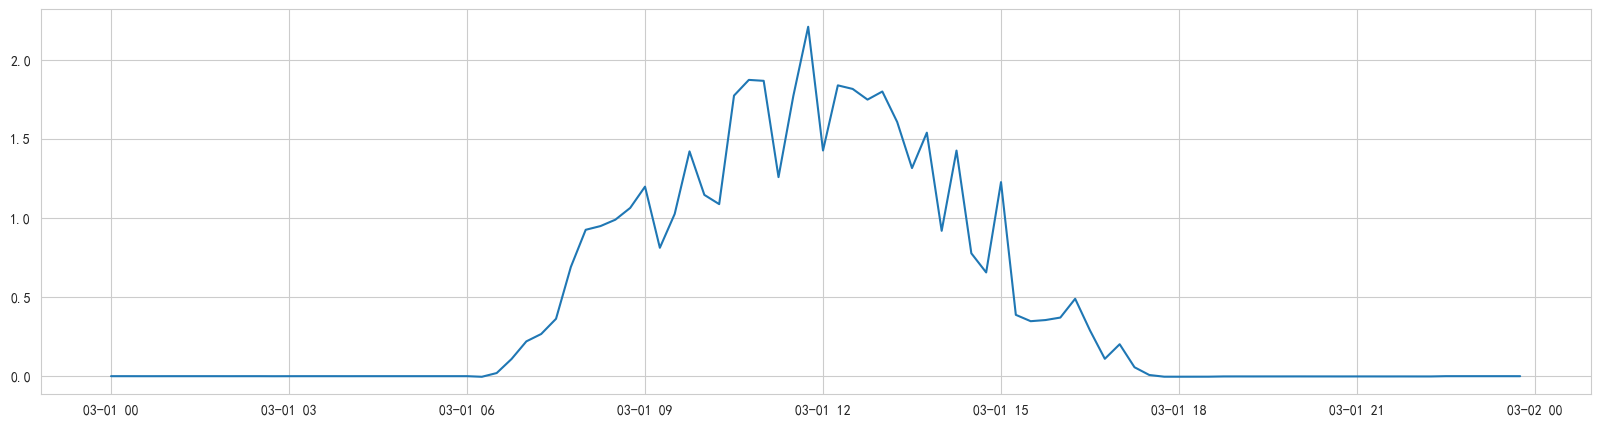

In [3]:
train_f1=train[train.UserID=='f1']
train_f1_oneday=train_f1[train_f1.ts.dt.date==date(2022,3,1)]

plt.figure(figsize=(20,5))
plt.plot(train_f1_oneday.ts,train_f1_oneday.target)
plt.show()

In [3]:
train.head()

UserID  ComRate                  ts  target  Capacity  Longitude   Latitude  \
0     f1       80 2022-01-03 00:00:00     0.0    239.22  119.21856  26.042931   
1     f1       80 2022-01-03 00:15:00     0.0    239.22  119.21856  26.042931   
2     f1       80 2022-01-03 00:30:00     0.0    239.22  119.21856  26.042931   
3     f1       80 2022-01-03 00:45:00     0.0    239.22  119.21856  26.042931   
4     f1       80 2022-01-03 01:00:00     0.0    239.22  119.21856  26.042931   

   AirPressure  RelativeHumidity  CloudAmount  10mWindSpeed  10mWindDirection  \
0  100361.6094           79.3513     0.007812        1.1695             270.0   
1  100351.1476           76.8741     0.007005        1.1490             270.0   
2  100341.8609           74.9771     0.006890        1.1556             270.0   
3  100333.2668           73.6136     0.007236        1.1807             270.0   
4  100324.8828           72.7366     0.007812        1.2157             270.0   

   Temperature  Radiation  Precipitation  100mWindSpeed  100mWindDirection  
0     280.6320        0.0       0.000229            0.0              270.0  
1     280.6308        0.0       0.000229            0.0              270.0  
2     280.5719        0.0       0.000229            0.0              270.0  
3     280.4776        0.0       0.000229            0.0              270.0  
4     280.3705        0.0       0.000229            0.0              270.0

In [4]:
test.head()

UserID  ComRate                  ts  target  Capacity  Longitude   Latitude  \
0     f1       80 2023-05-01 00:00:00     0.0    239.22  119.21856  26.042931   
1     f1       80 2023-05-01 00:15:00     0.0    239.22  119.21856  26.042931   
2     f1       80 2023-05-01 00:30:00     0.0    239.22  119.21856  26.042931   
3     f1       80 2023-05-01 00:45:00     0.0    239.22  119.21856  26.042931   
4     f1       80 2023-05-01 01:00:00     0.0    239.22  119.21856  26.042931   

   AirPressure  RelativeHumidity  CloudAmount  10mWindSpeed  10mWindDirection  \
0   99453.6250           89.8487      0.89844       0.54929             270.0   
1   99445.4611           92.4332      0.92999       0.53548             270.0   
2   99434.1857           92.5277      0.92273       0.59624             270.0   
3   99420.7315           91.2865      0.90333       0.69339             270.0   
4   99406.0313           89.8641      0.89844       0.78874             270.0   

   Temperature  Radiation  Precipitation  100mWindSpeed  100mWindDirection  
0     287.6853        0.0       0.006908        0.00000              270.0  
1     287.7061        0.0       0.005454        0.00000              270.0  
2     287.6017        0.0       0.005404        0.00000              270.0  
3     287.4312        0.0       0.006106        0.13264              270.0  
4     287.2534        0.0       0.006908        0.29370              270.0

# 数据分布情况分析

In [4]:
columns = ['AirPressure', 'RelativeHumidity', 'CloudAmount','Temperature', 'Radiation',
       'Precipitation']

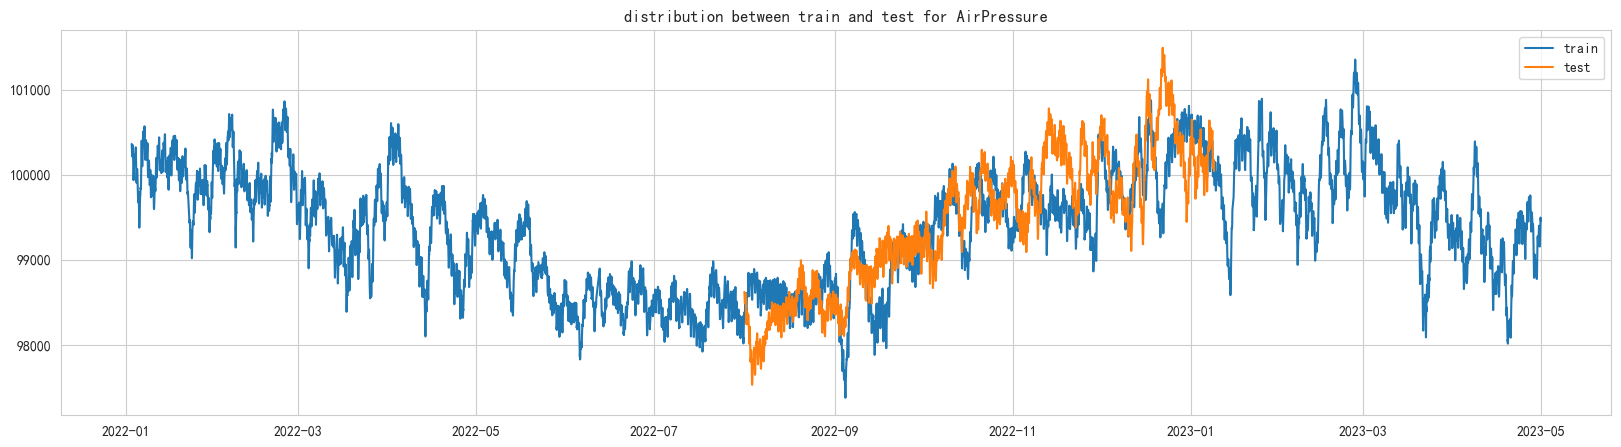

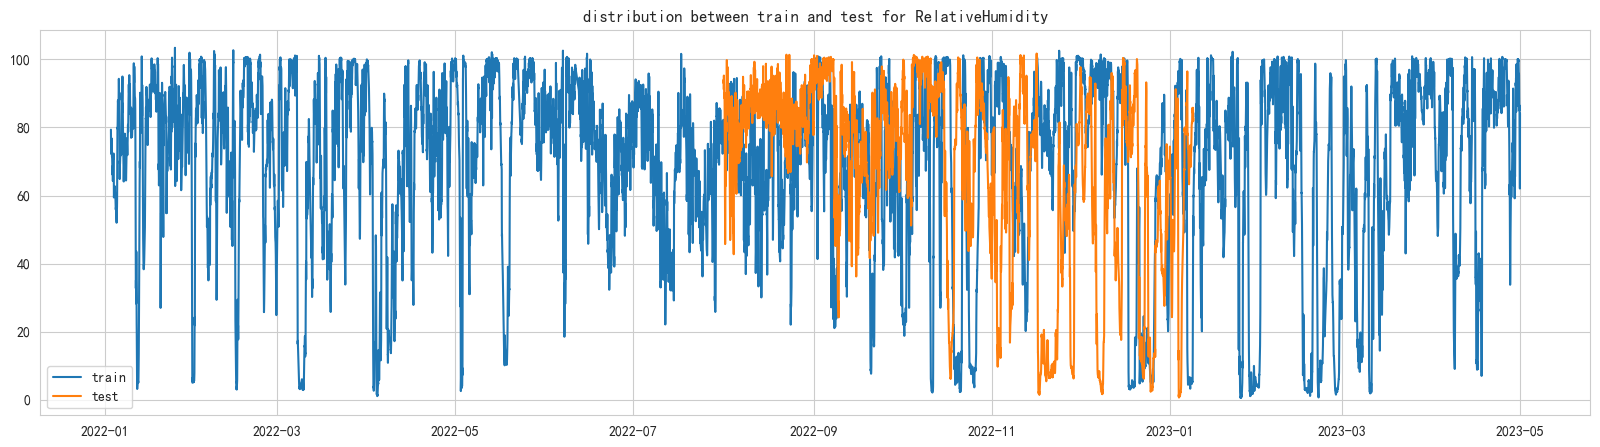

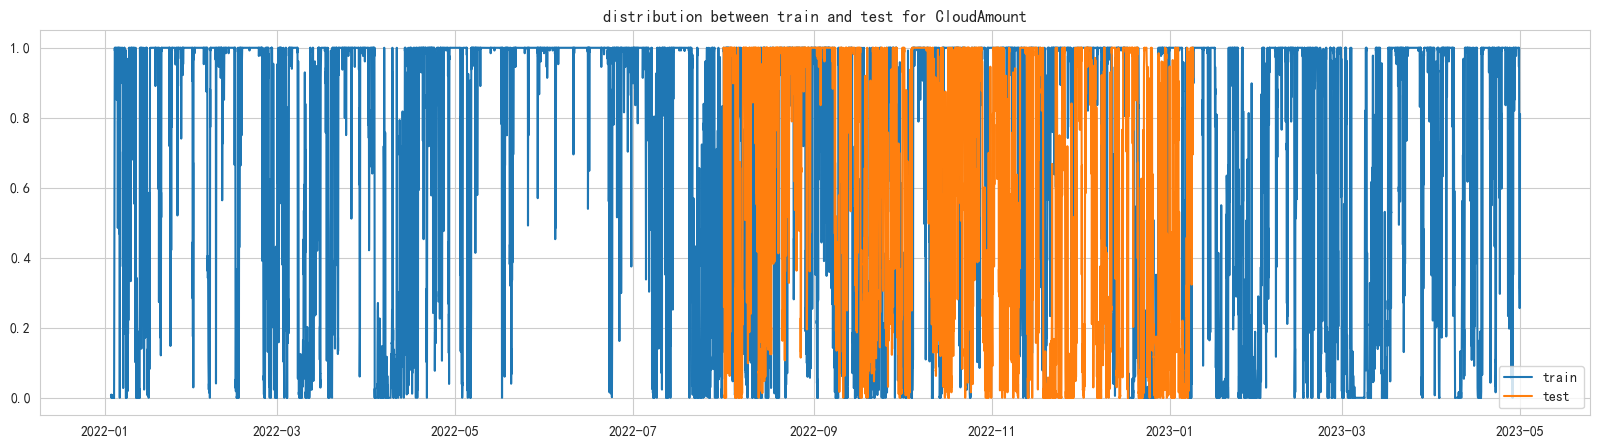

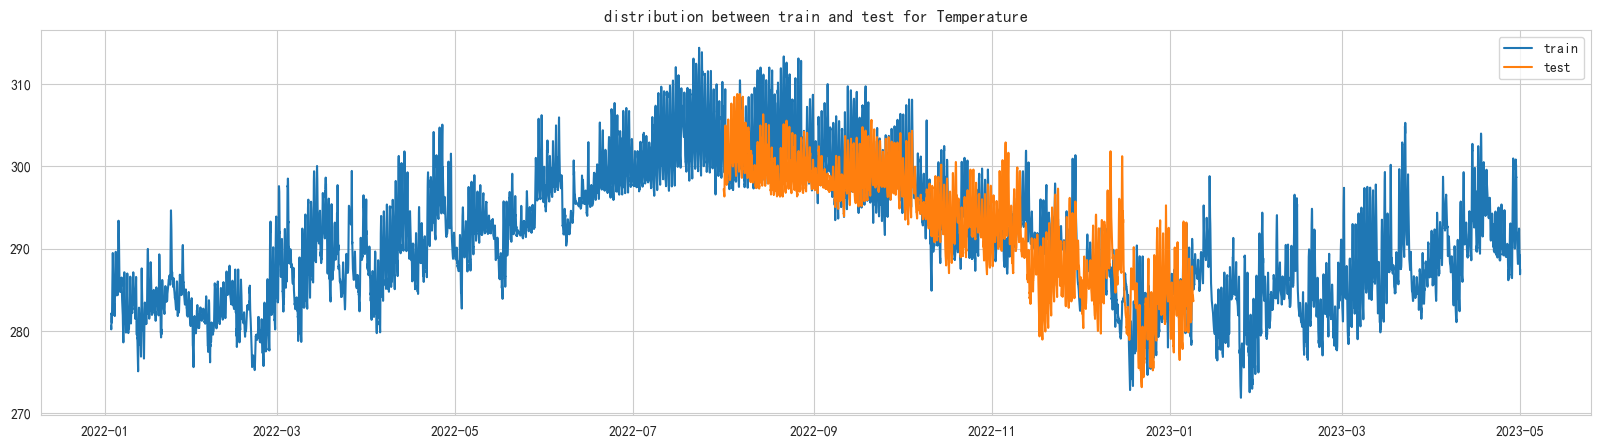

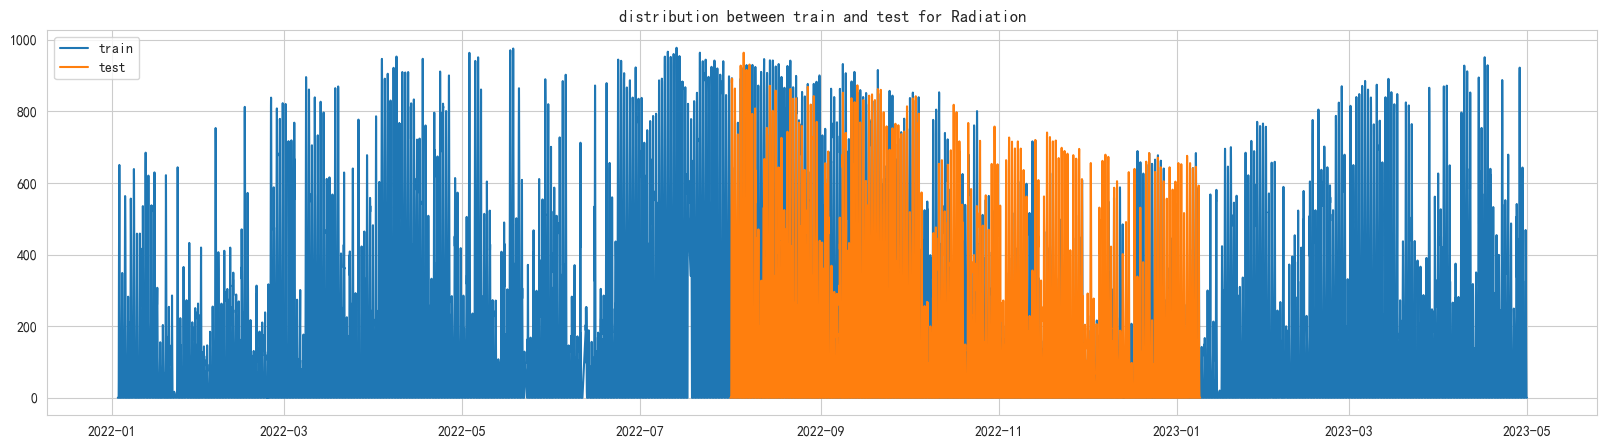

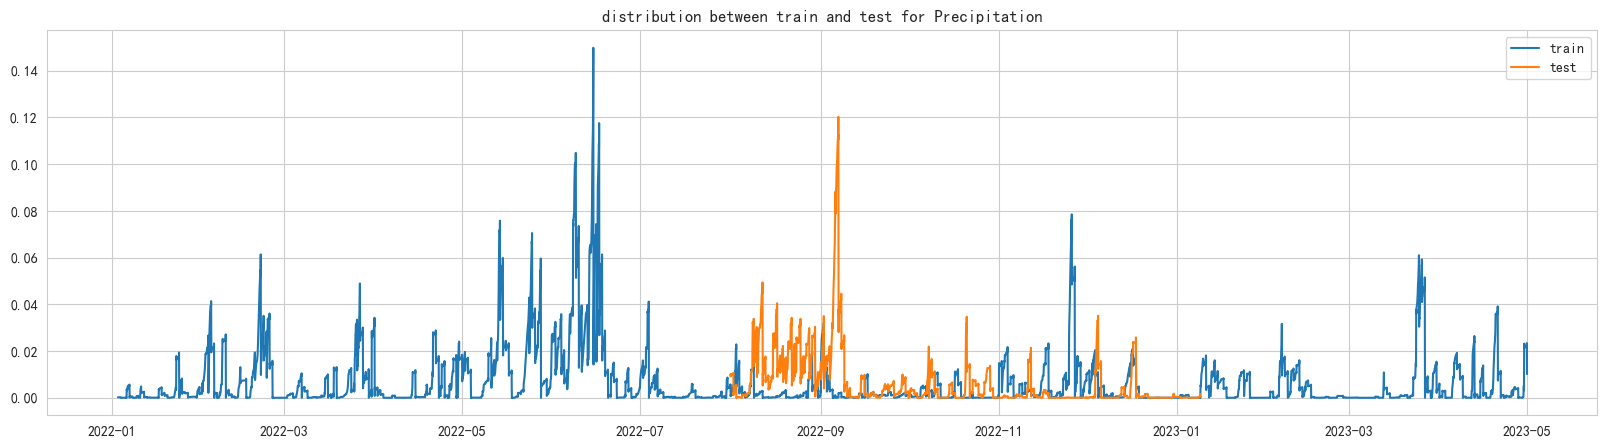

In [5]:
# analysis f1
train_f1=train[train.UserID=='f1']
test_f1=test[test.UserID=='f1']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f1.ts,train_f1[col],label='train')
    plt.plot(test_f1.ts.apply(lambda x:x-timedelta(days=365)),test_f1[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

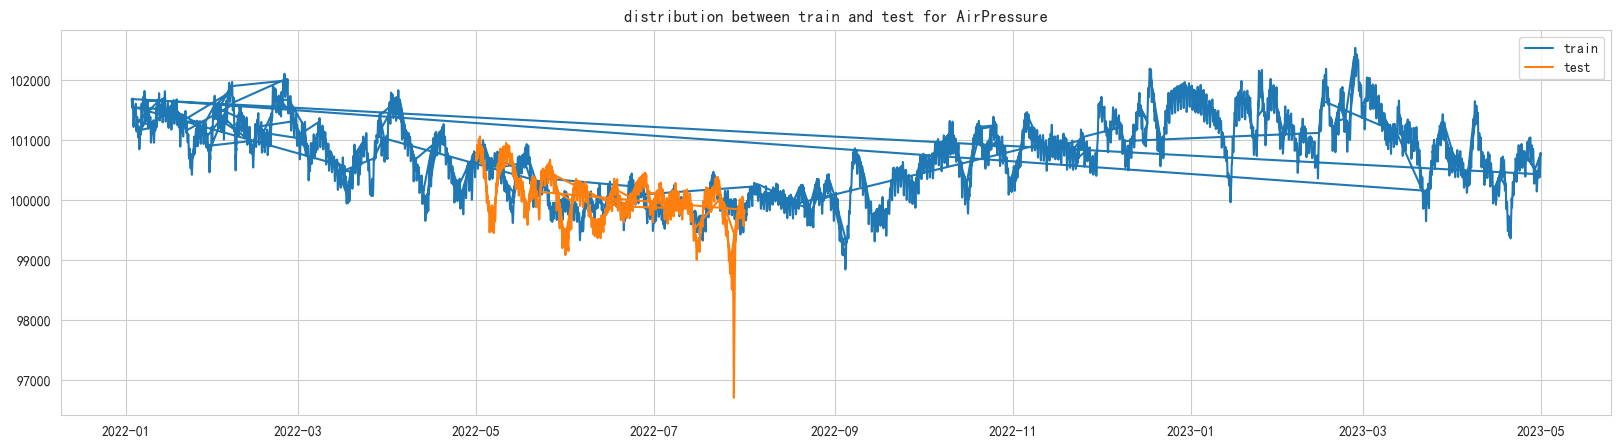

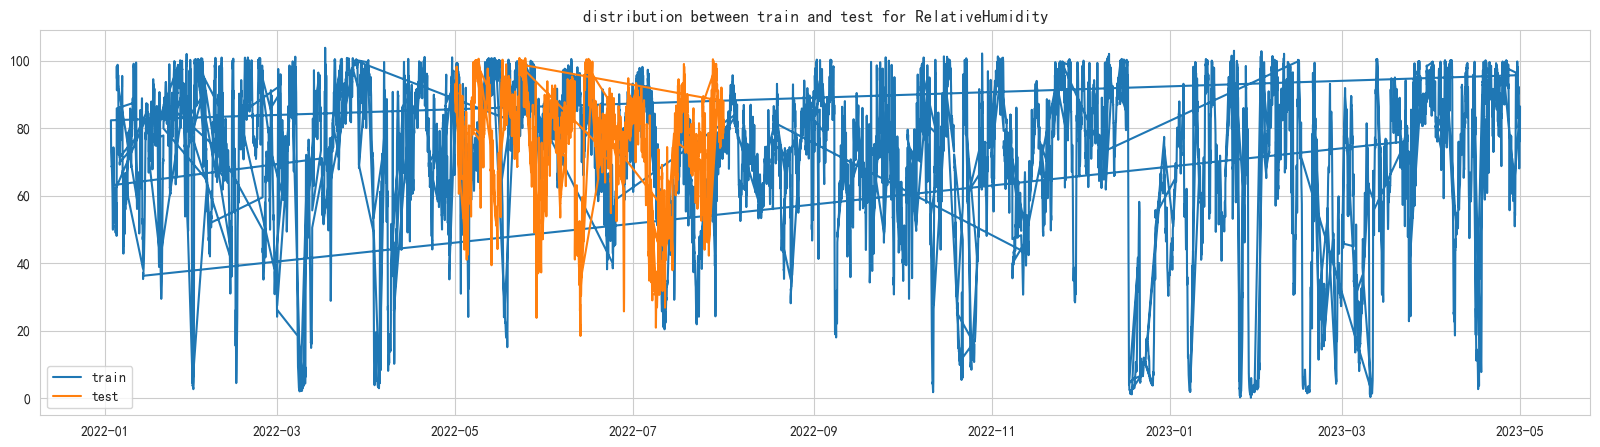

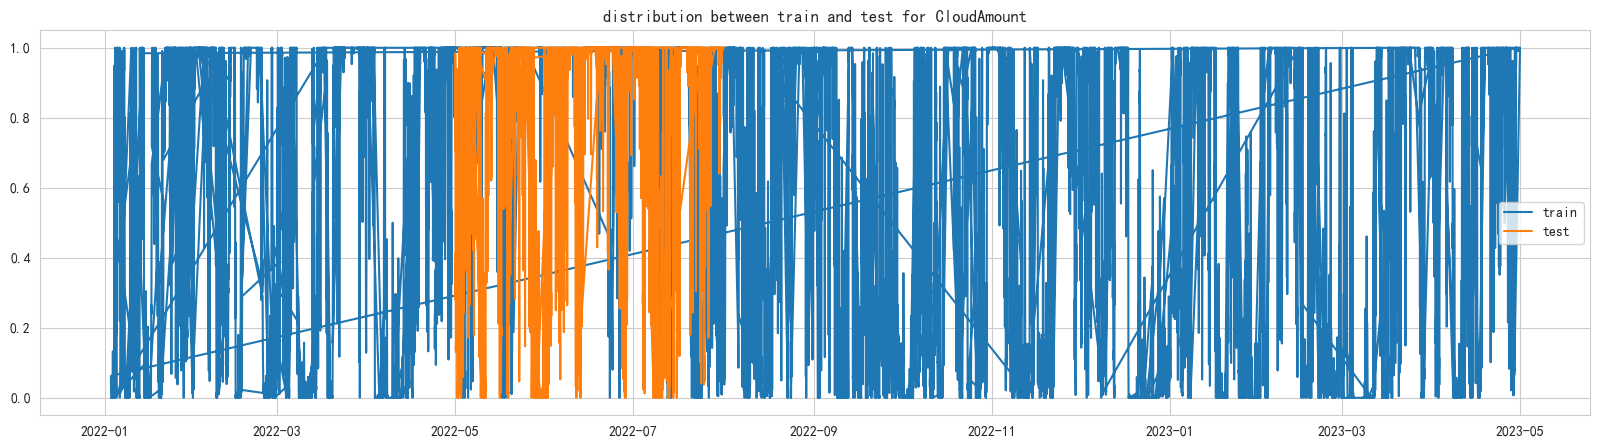

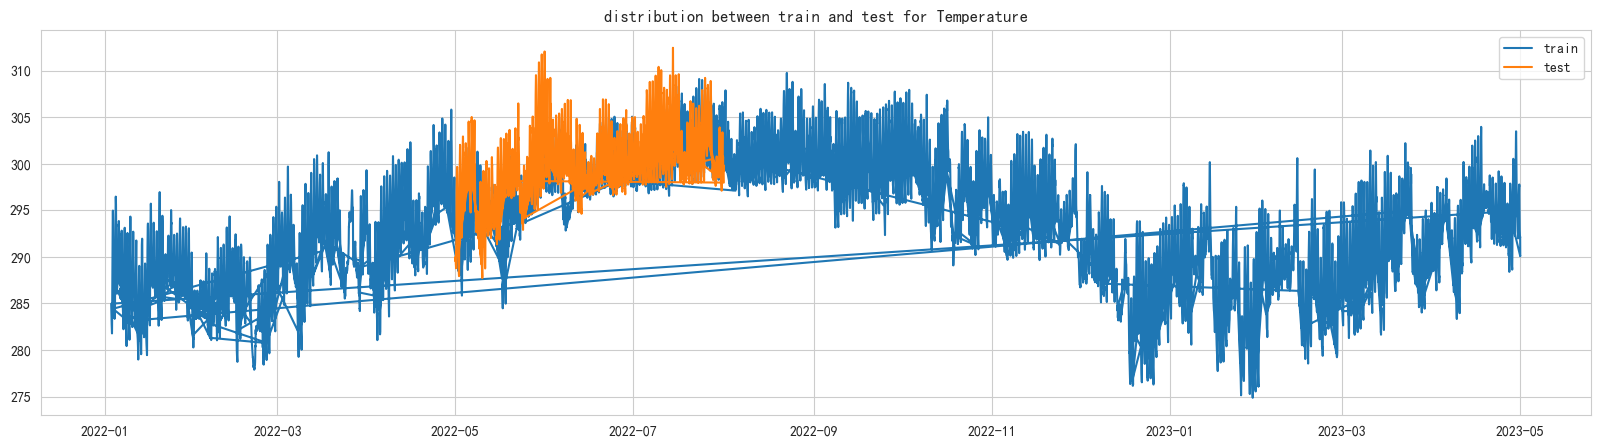

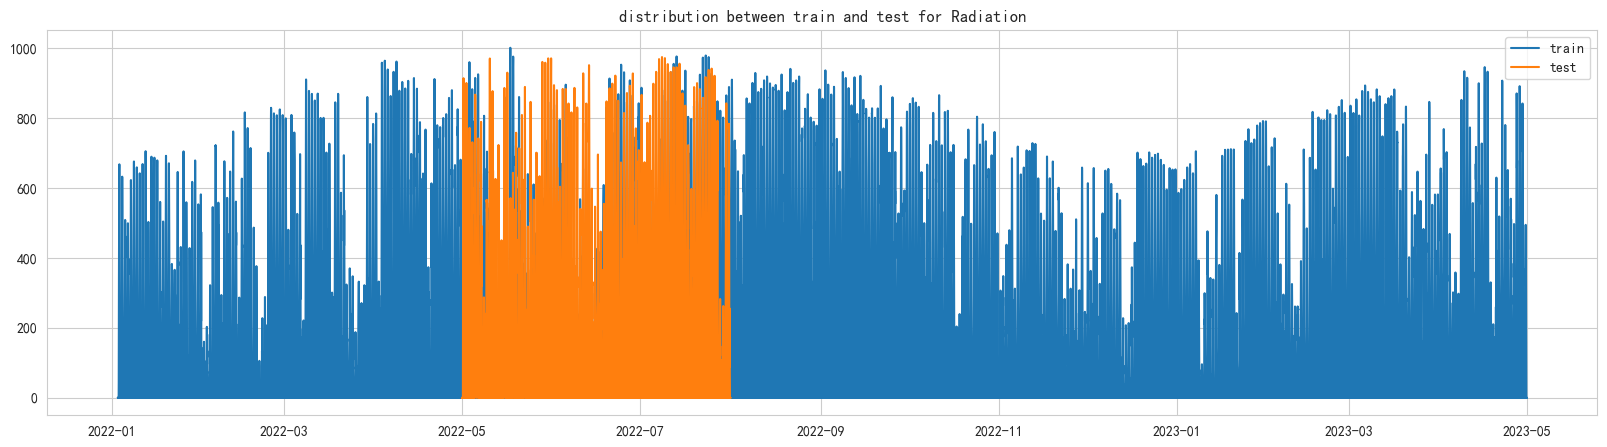

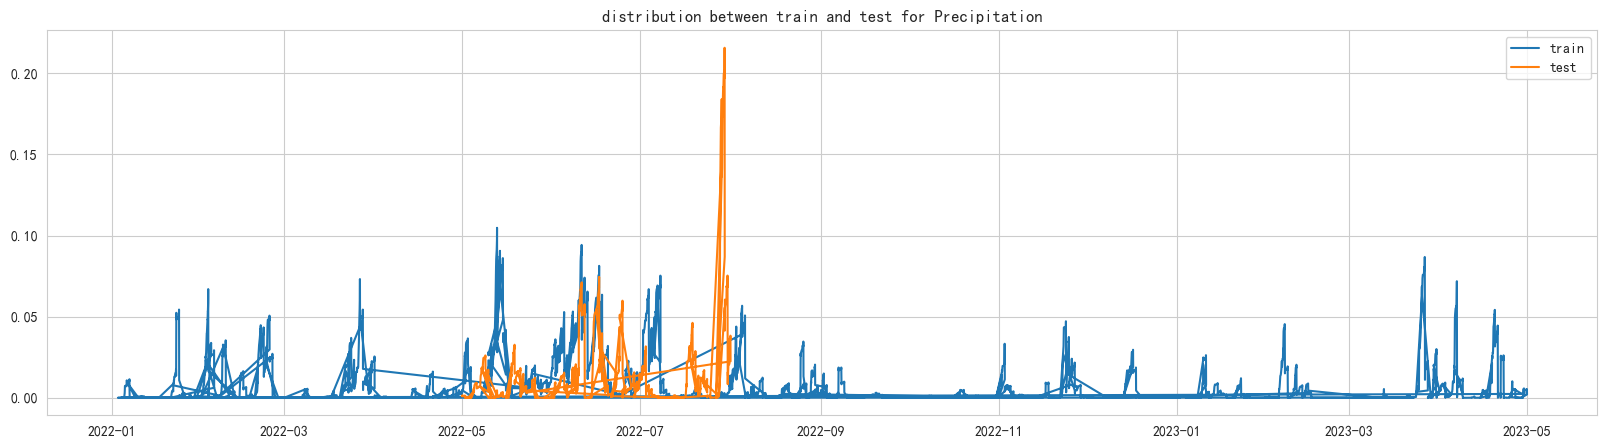

In [10]:
# analysis f2
train_f2=train[train.UserID=='f2']
test_f2=test[test.UserID=='f2']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f2.ts,train_f2[col],label='train')
    plt.plot(test_f2.ts.apply(lambda x:x-timedelta(days=365)),test_f2[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

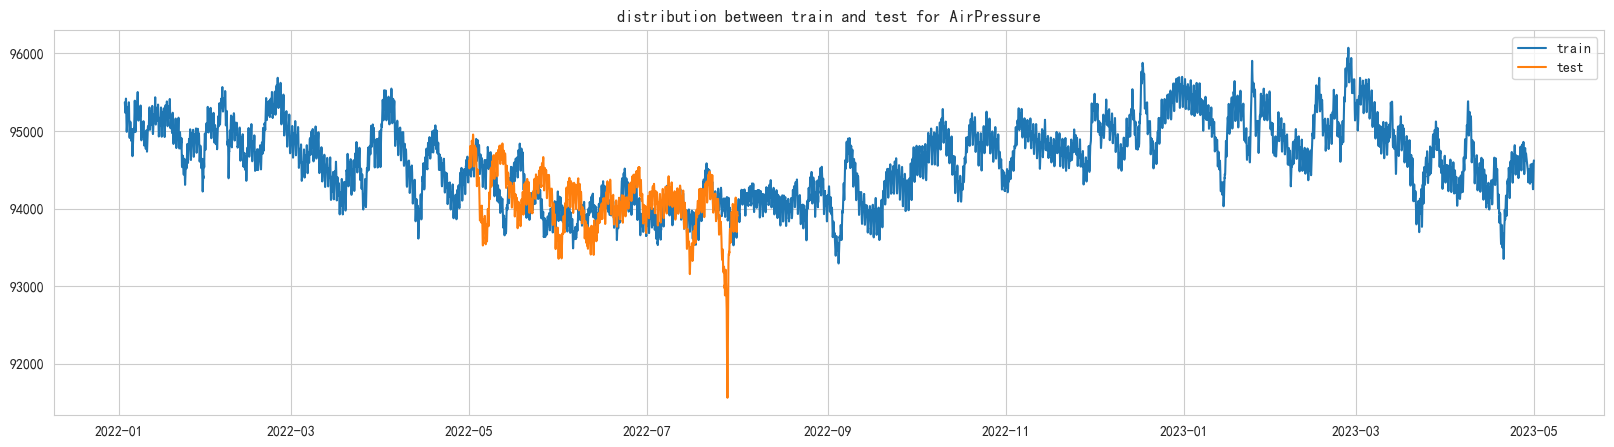

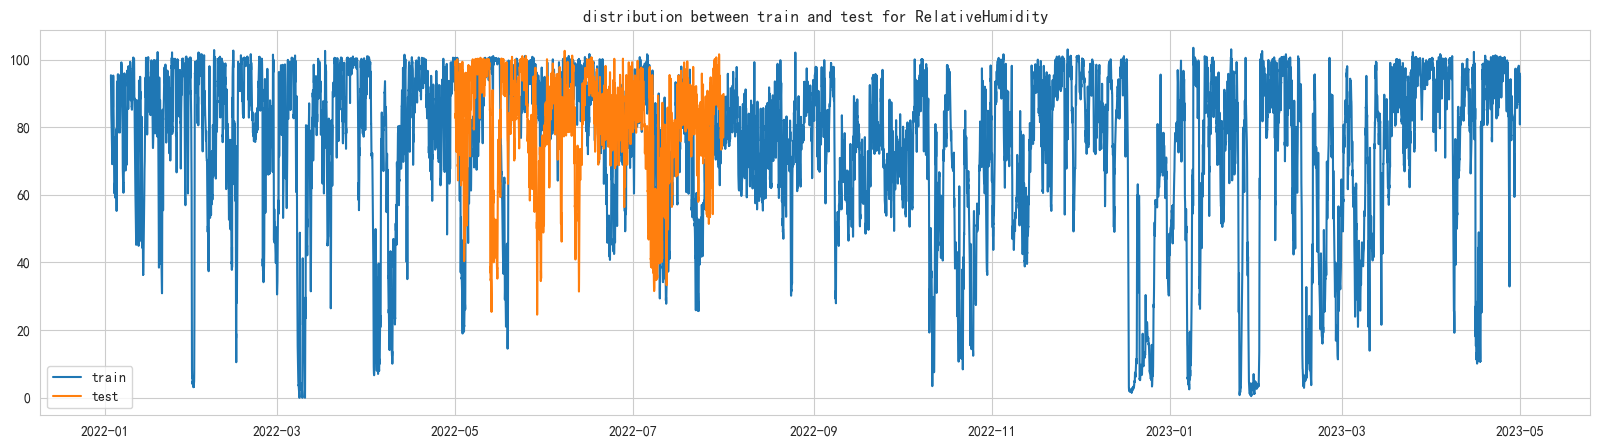

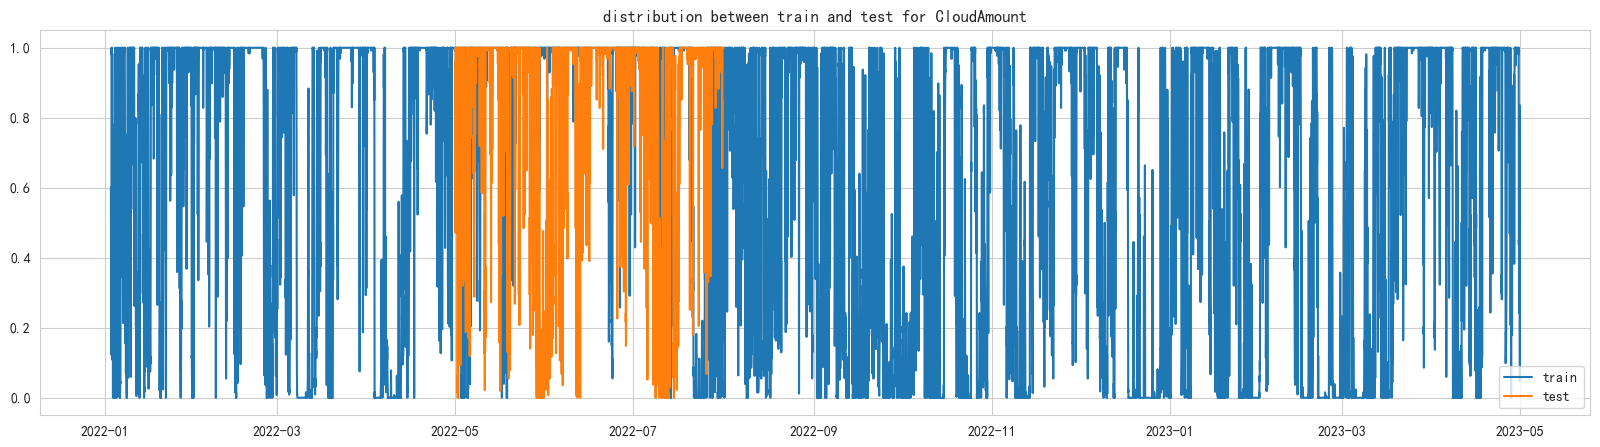

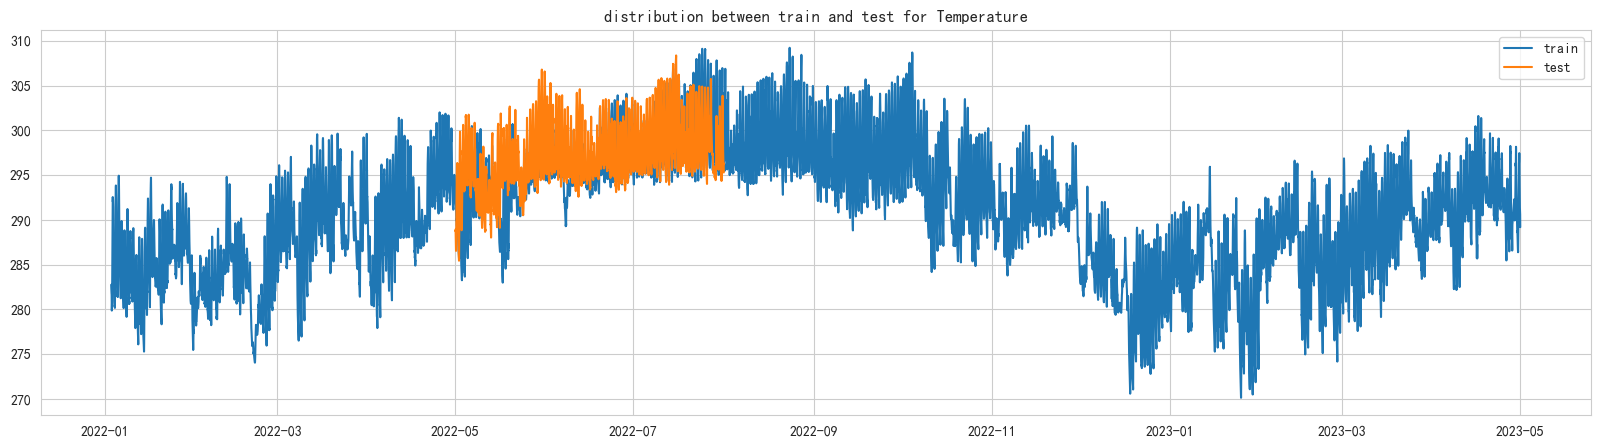

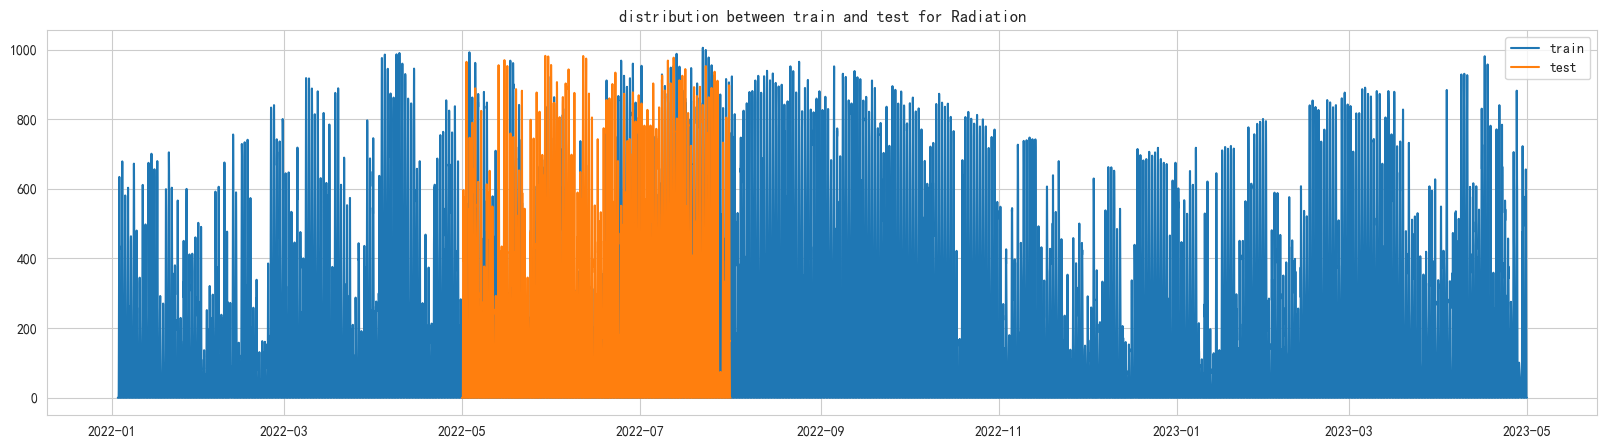

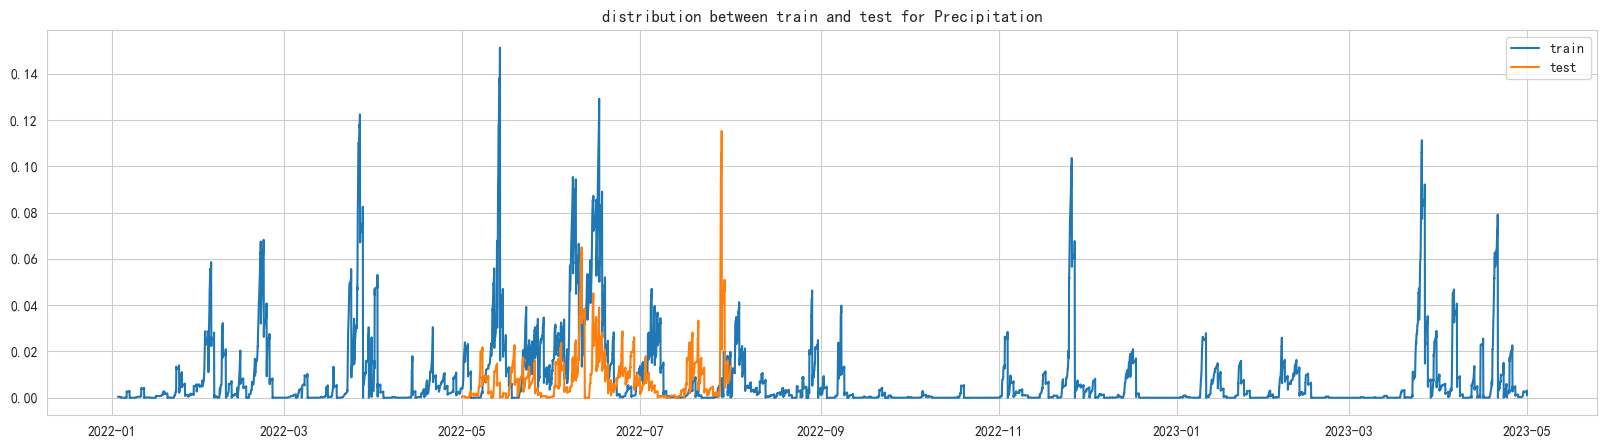

In [12]:
# analysis f3
train_f3=train[train.UserID=='f3']
test_f3=test[test.UserID=='f3']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f3.ts,train_f3[col],label='train')
    plt.plot(test_f3.ts.apply(lambda x:x-timedelta(days=365)),test_f3[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

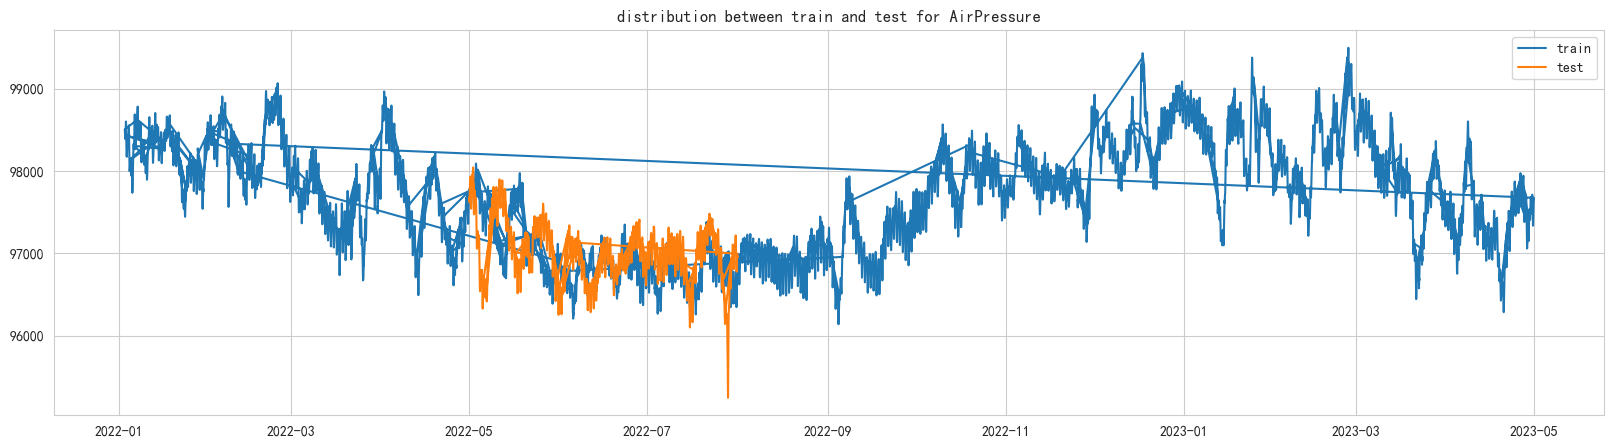

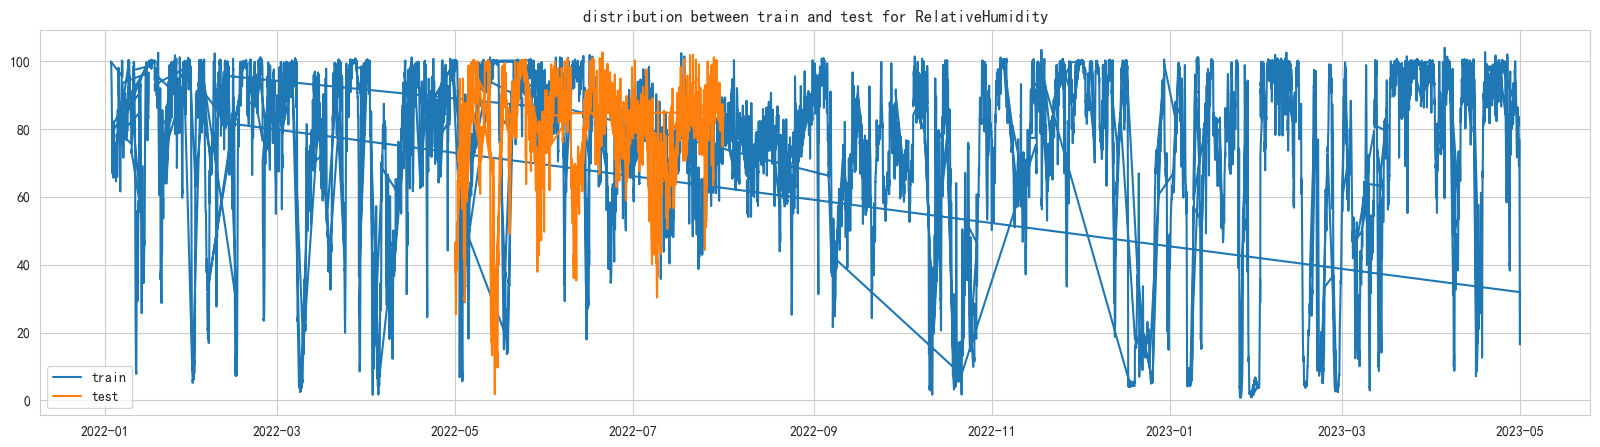

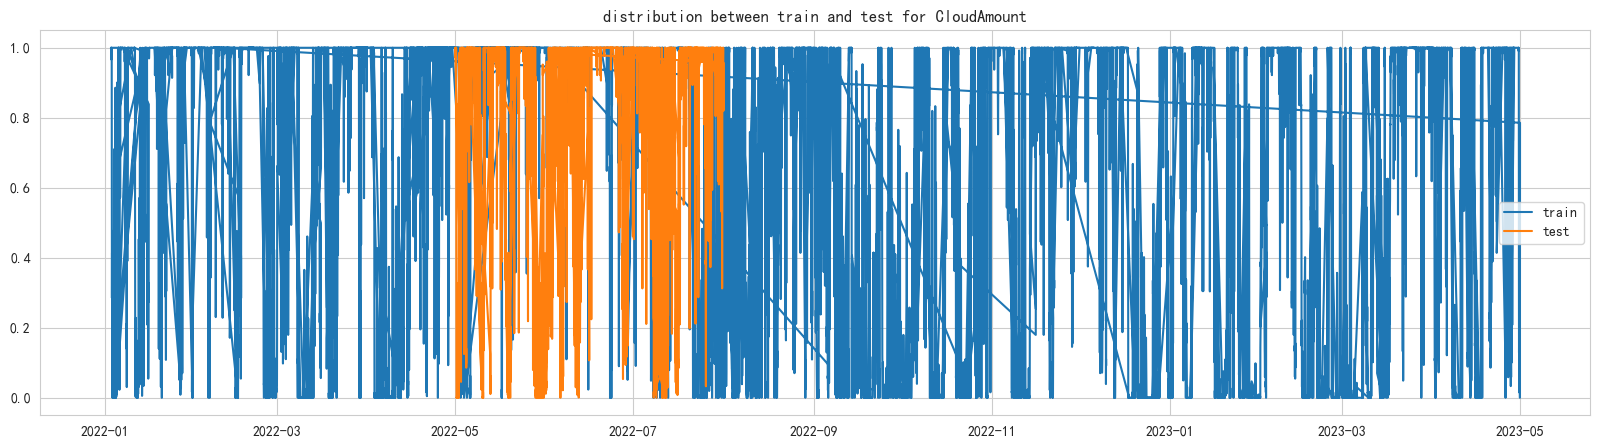

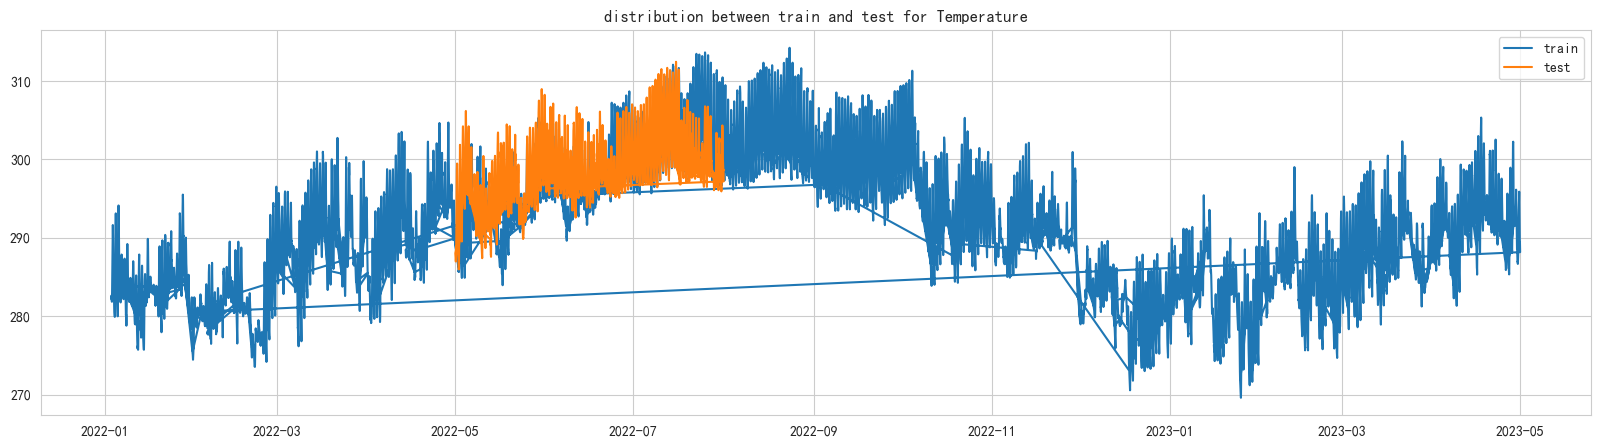

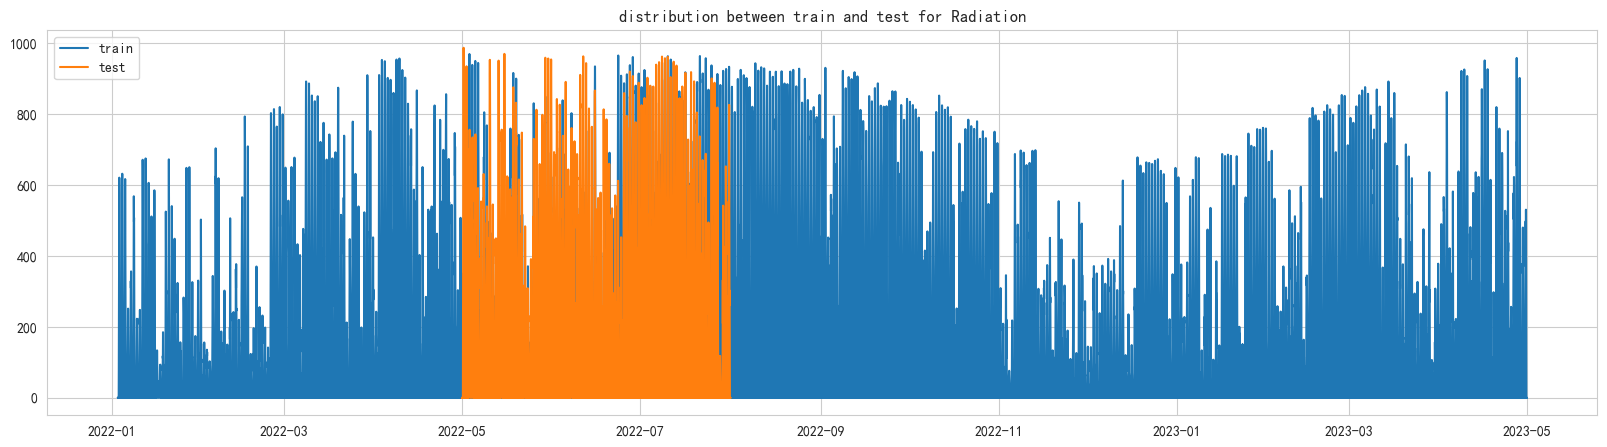

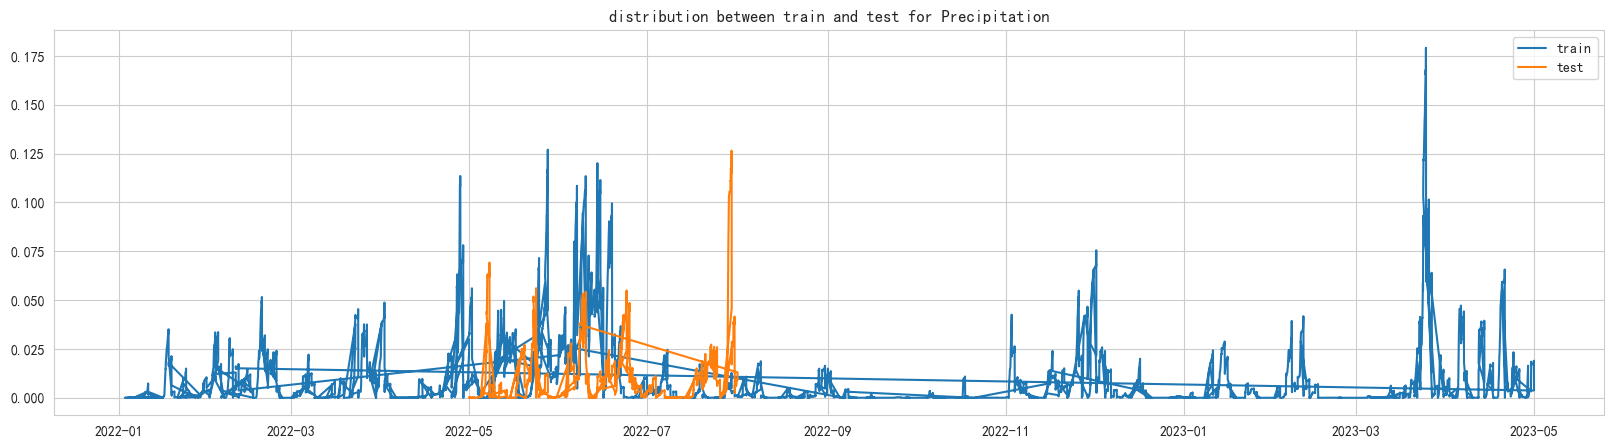

In [14]:
# analysis f4
train_f4=train[train.UserID=='f4']
test_f4=test[test.UserID=='f4']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f4.ts,train_f4[col],label='train')
    plt.plot(test_f4.ts.apply(lambda x:x-timedelta(days=365)),test_f4[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

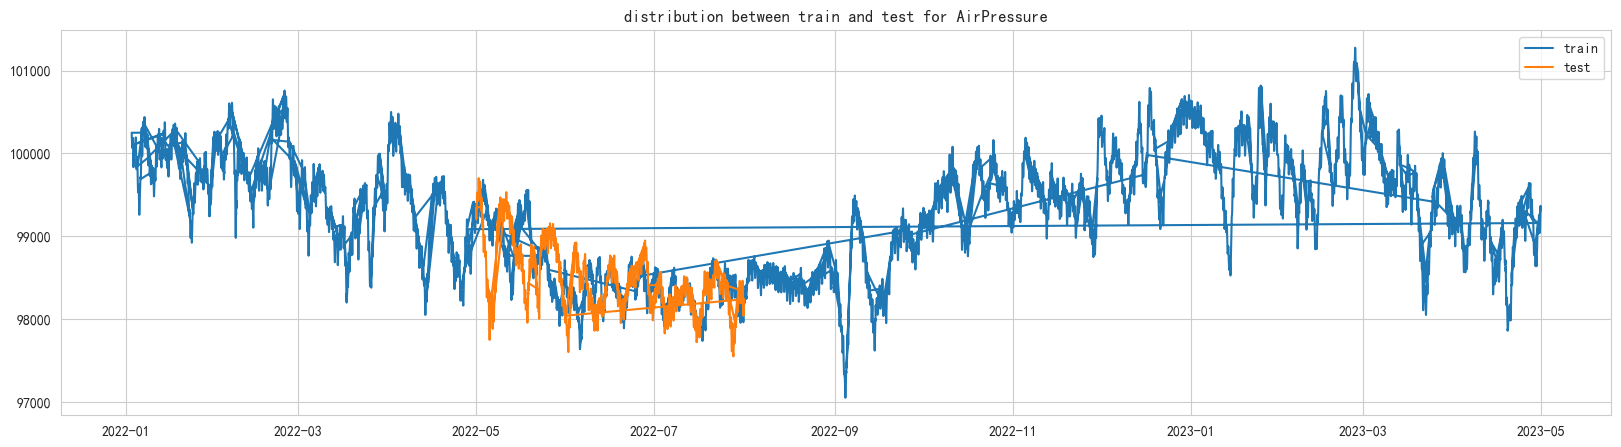

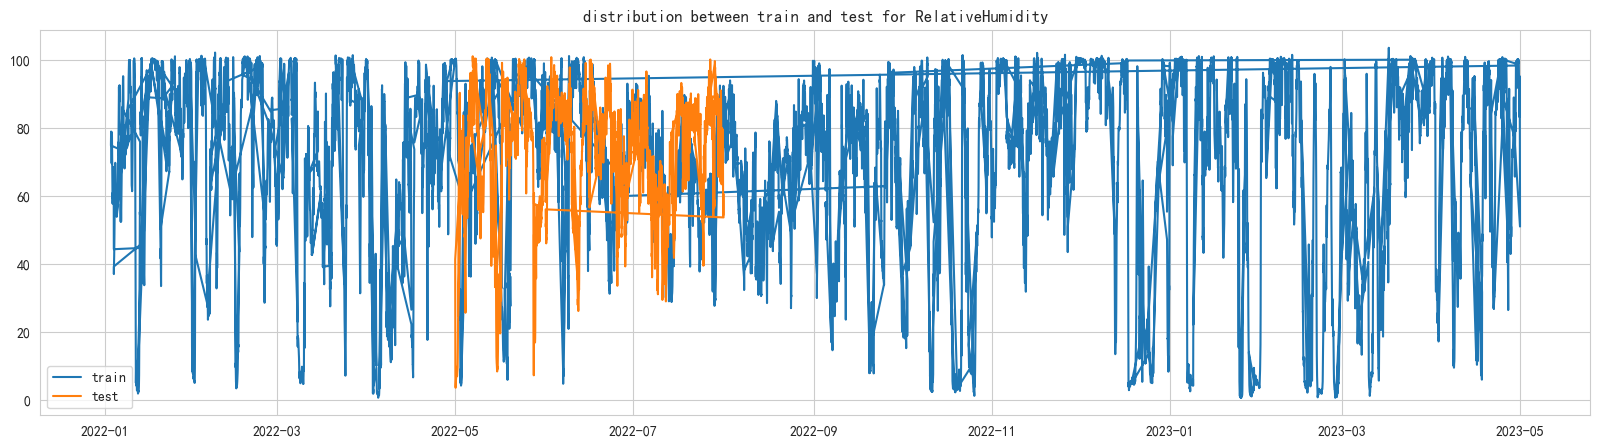

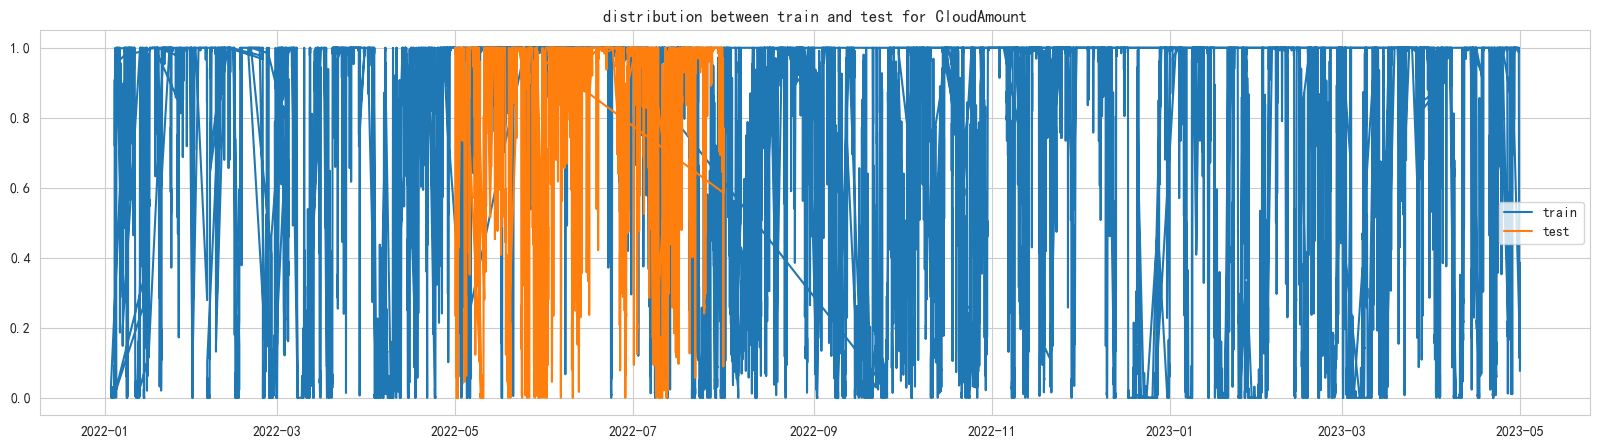

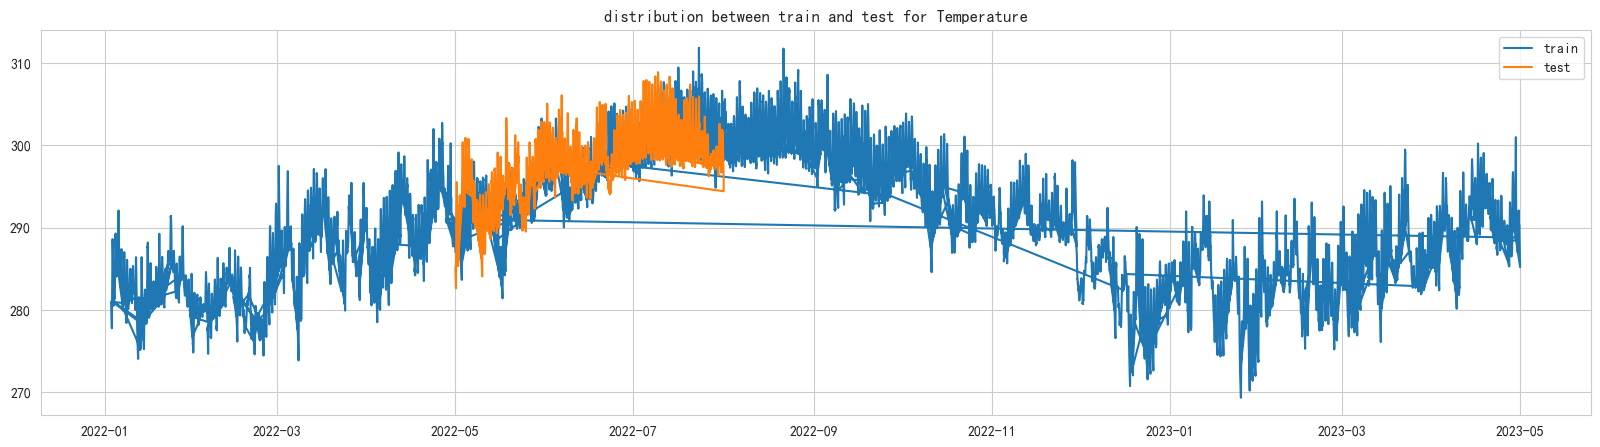

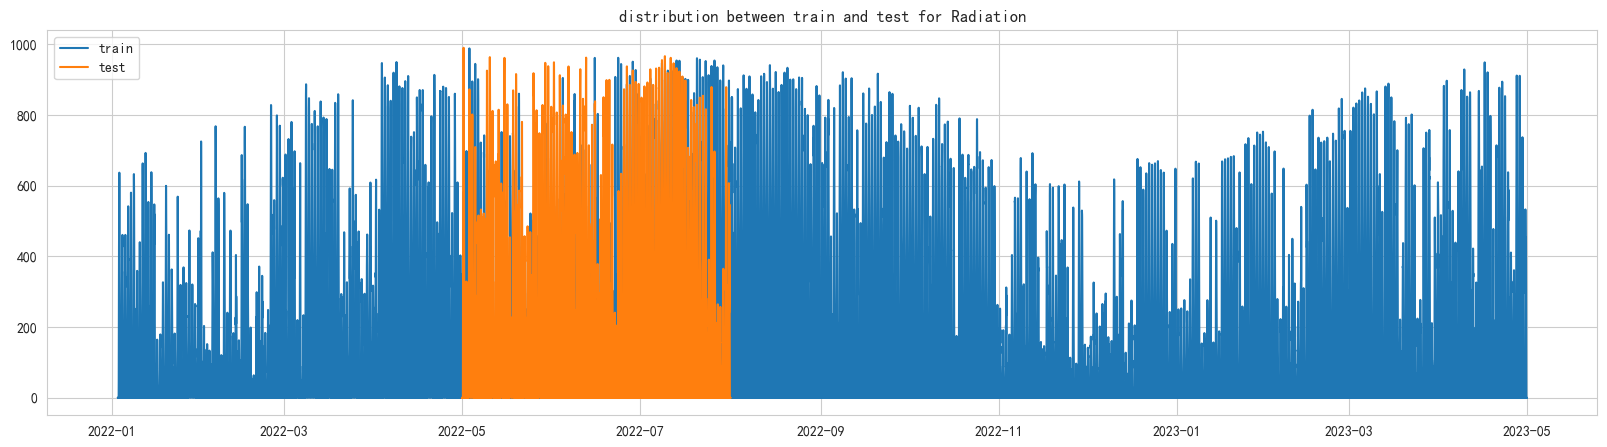

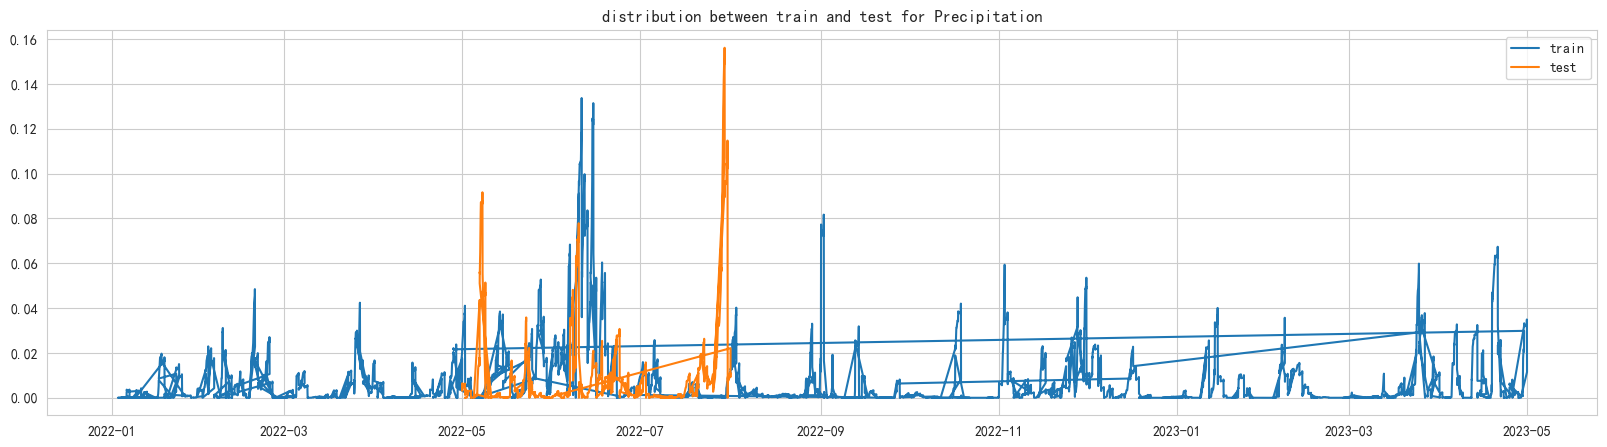

In [16]:
# analysis f5
train_f5=train[train.UserID=='f5']
test_f5=test[test.UserID=='f5']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f5.ts,train_f5[col],label='train')
    plt.plot(test_f5.ts.apply(lambda x:x-timedelta(days=365)),test_f5[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

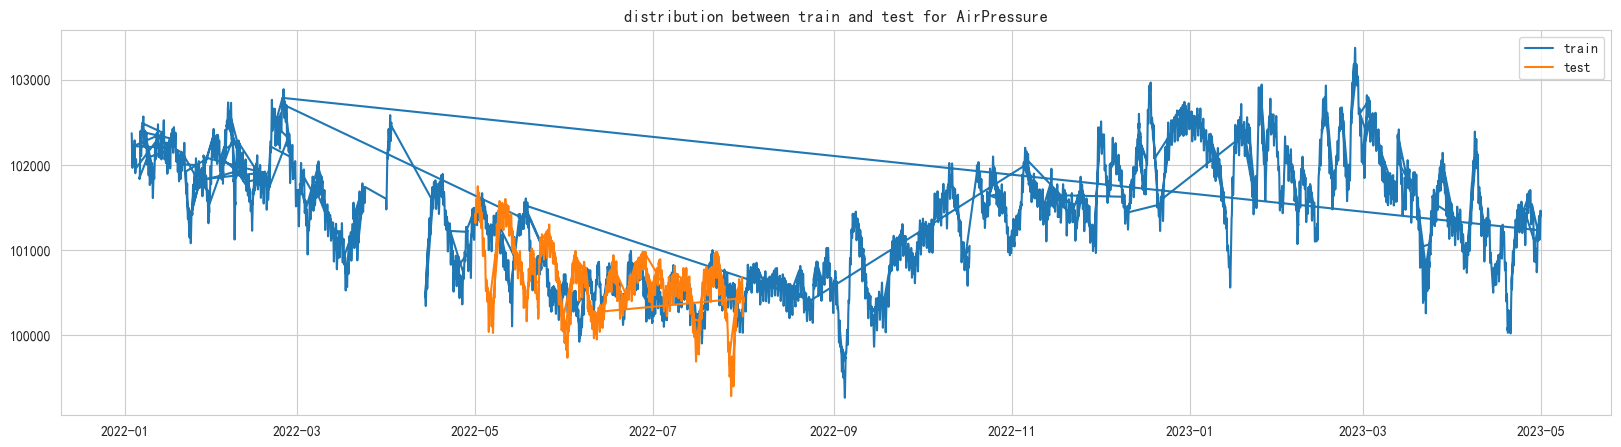

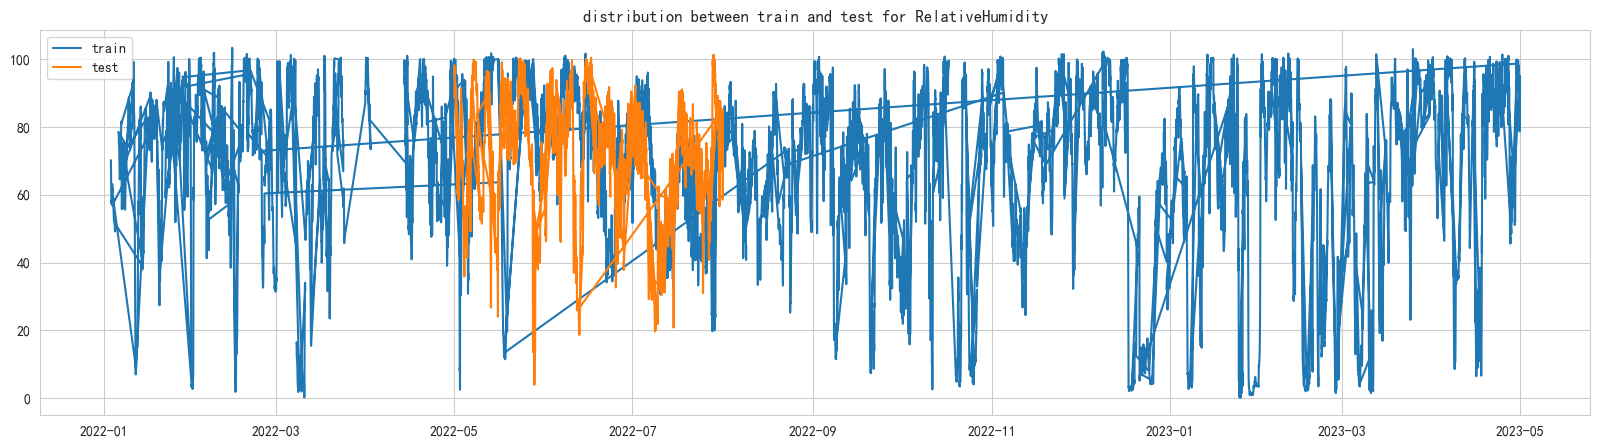

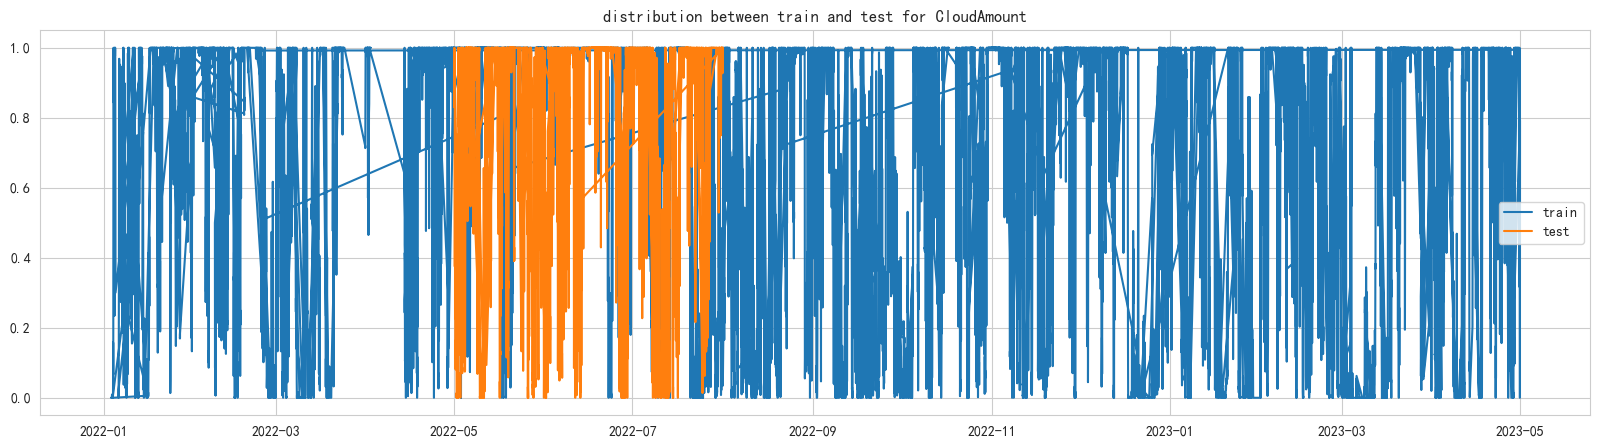

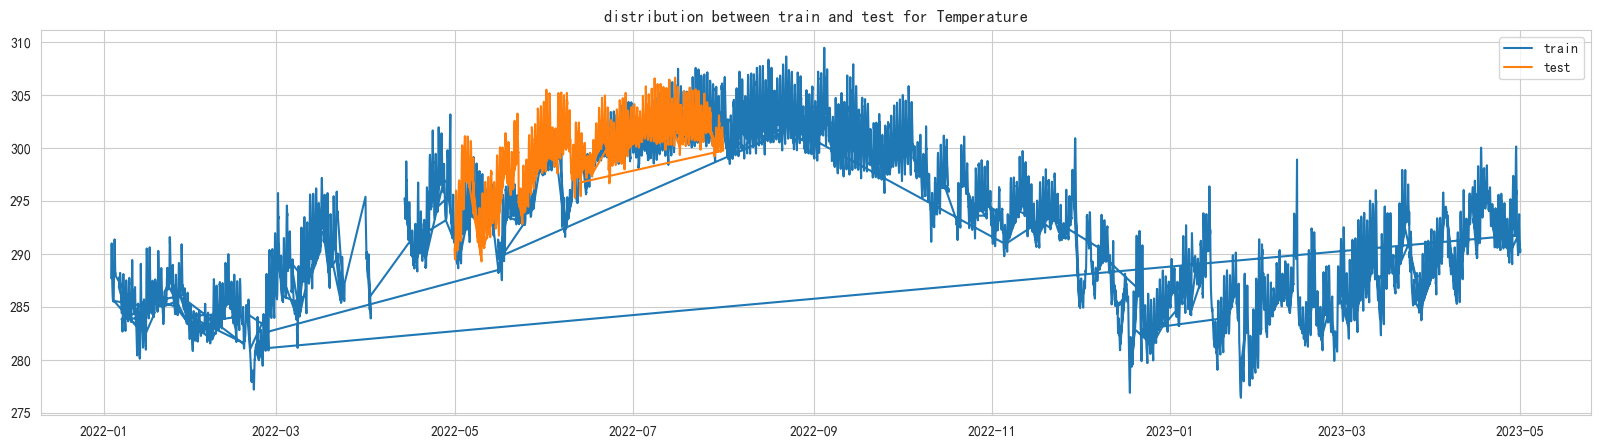

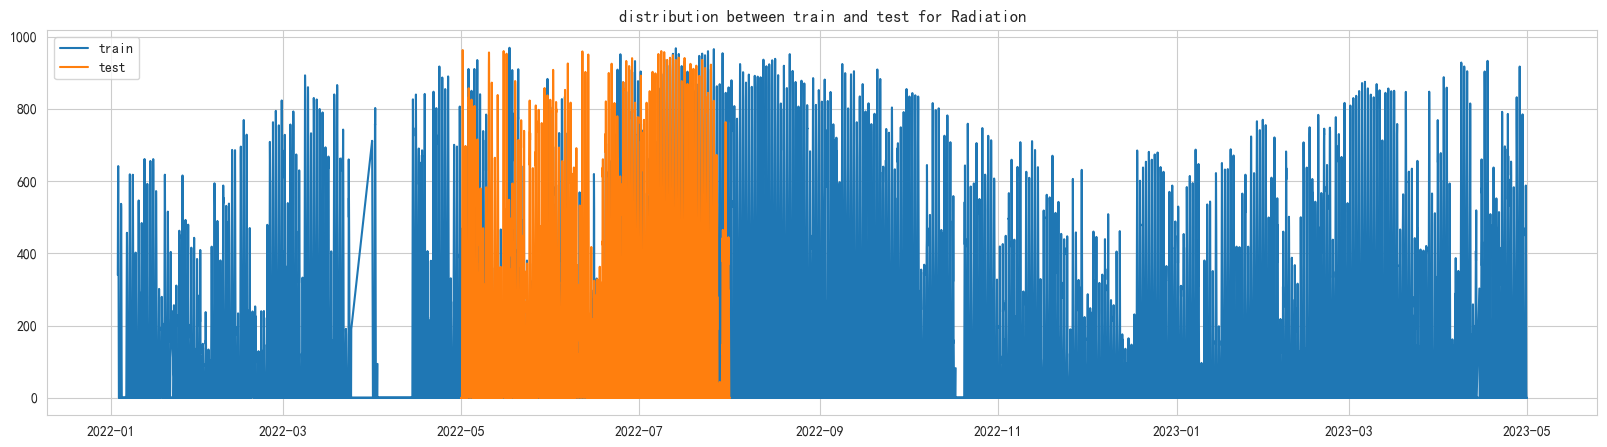

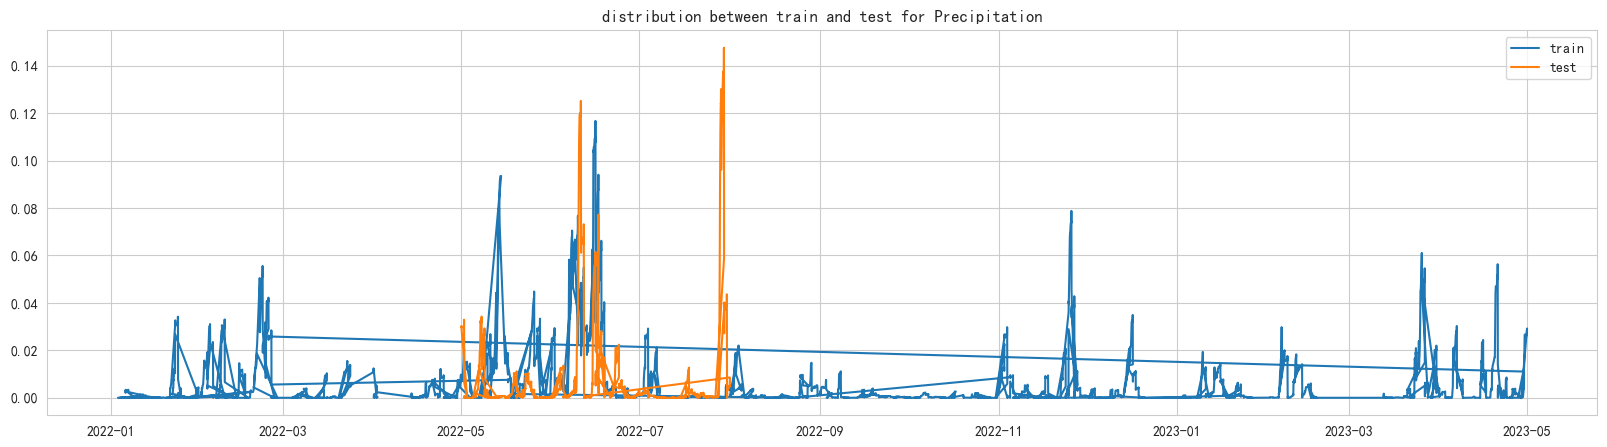

In [18]:
# analysis f6
train_f6=train[train.UserID=='f6']
test_f6=test[test.UserID=='f6']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f6.ts,train_f6[col],label='train')
    plt.plot(test_f6.ts.apply(lambda x:x-timedelta(days=365)),test_f6[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

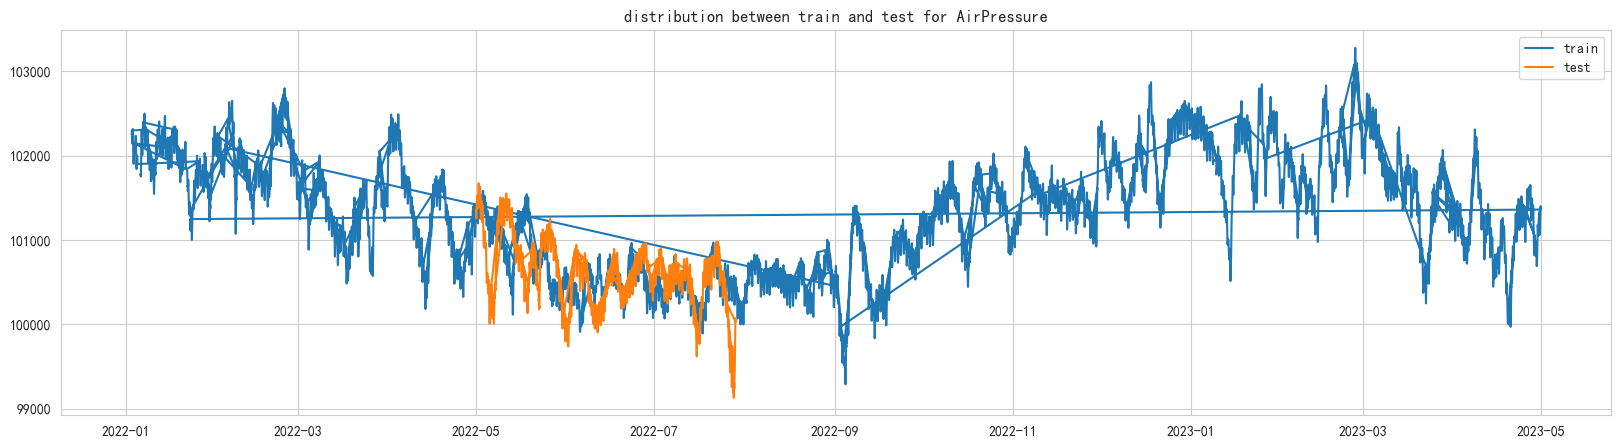

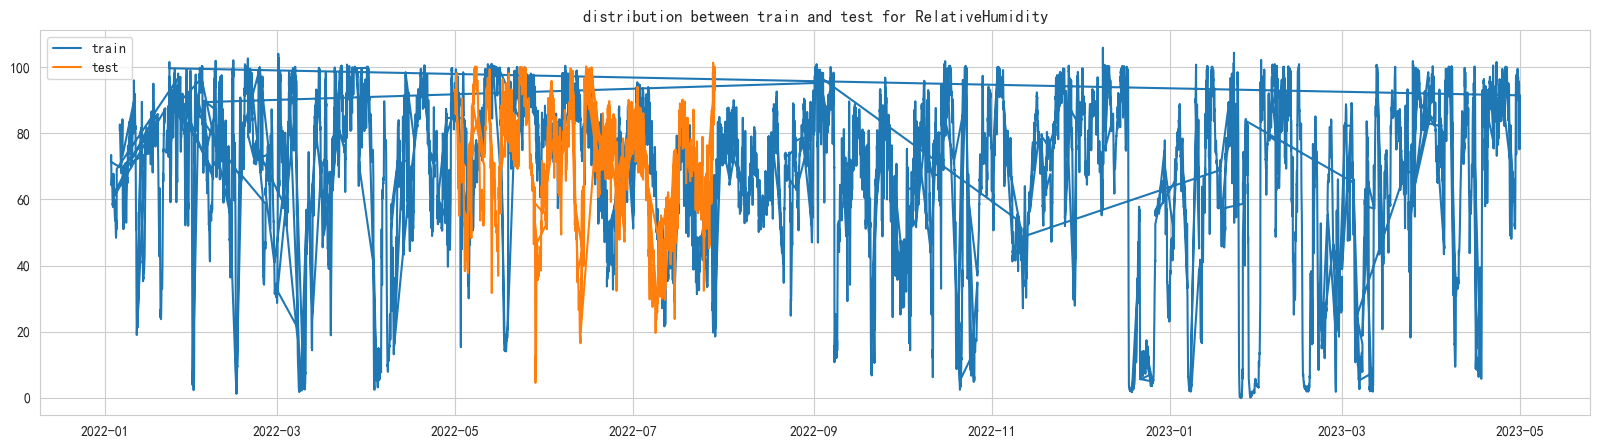

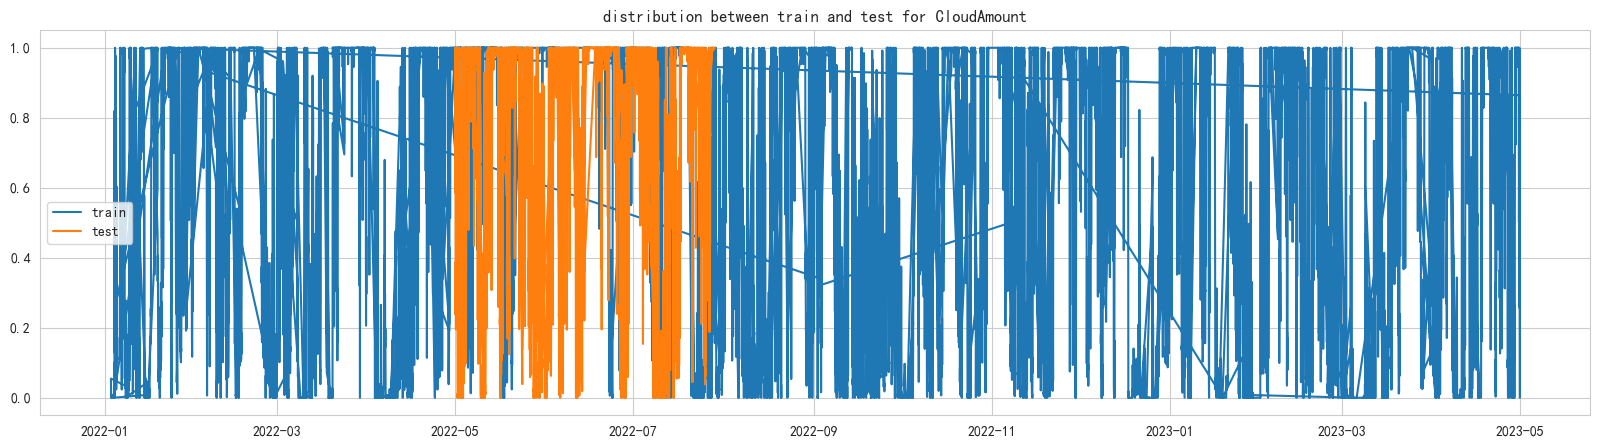

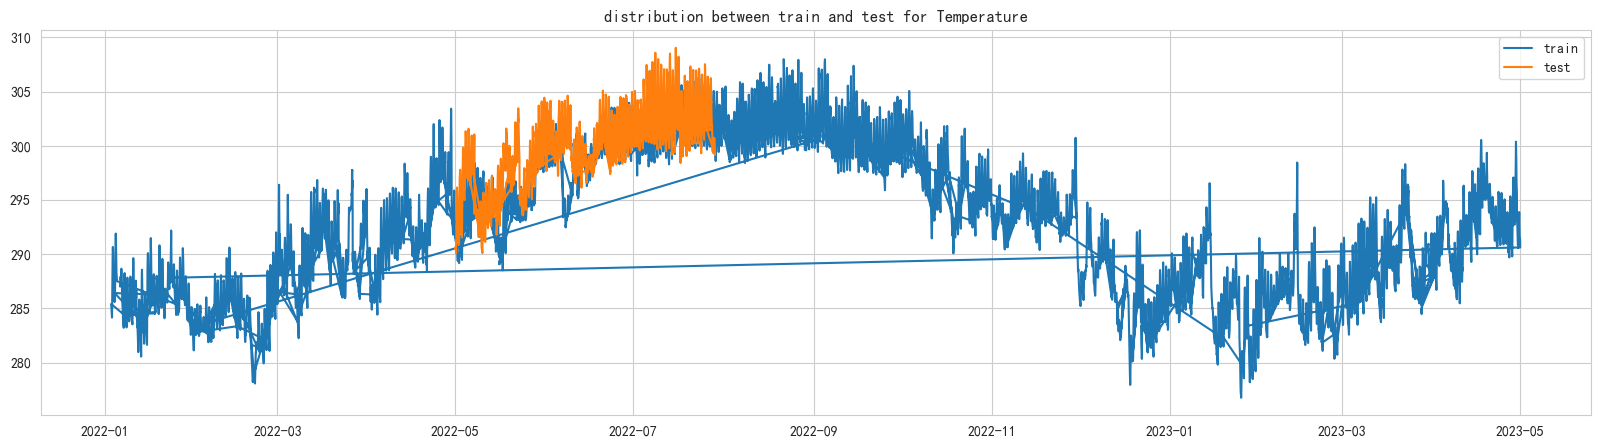

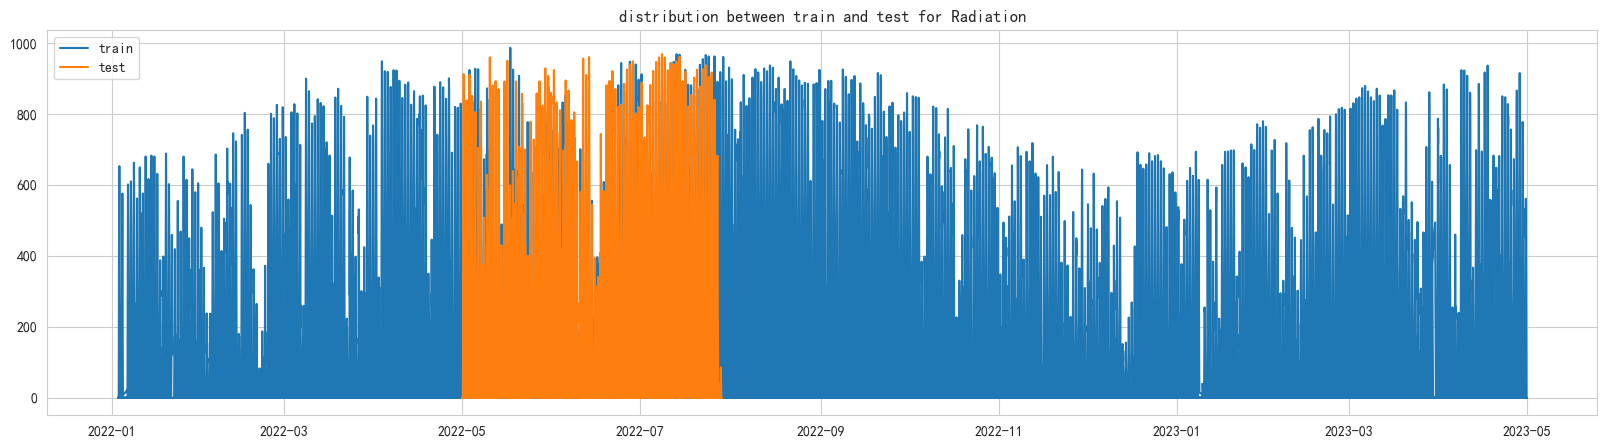

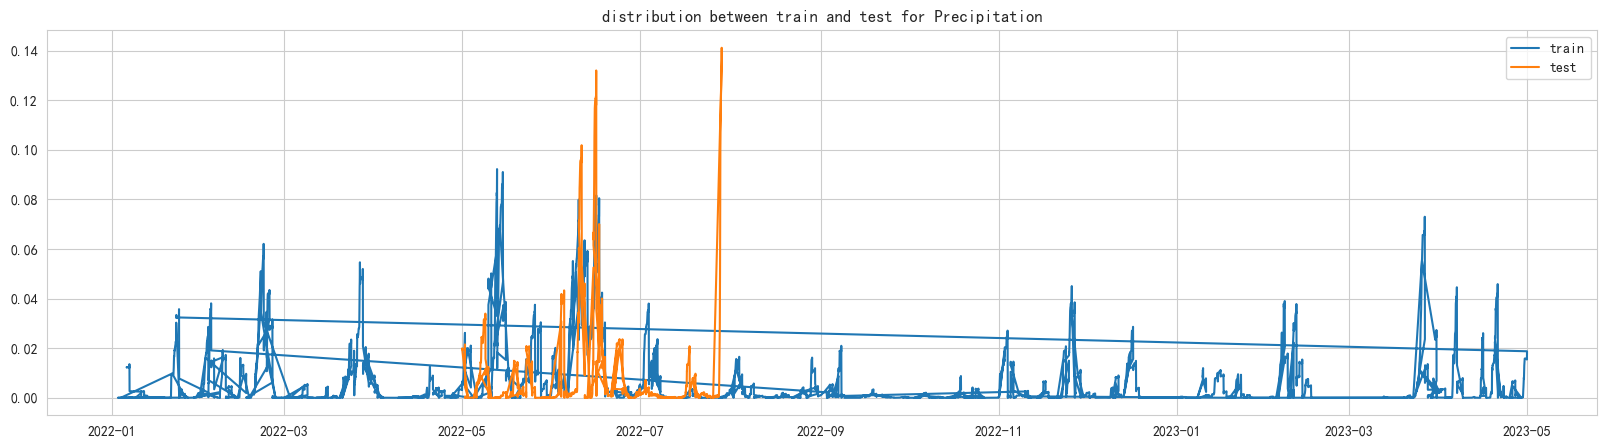

In [19]:
# analysis f7
train_f7=train[train.UserID=='f7']
test_f7=test[test.UserID=='f7']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f7.ts,train_f7[col],label='train')
    plt.plot(test_f7.ts.apply(lambda x:x-timedelta(days=365)),test_f7[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

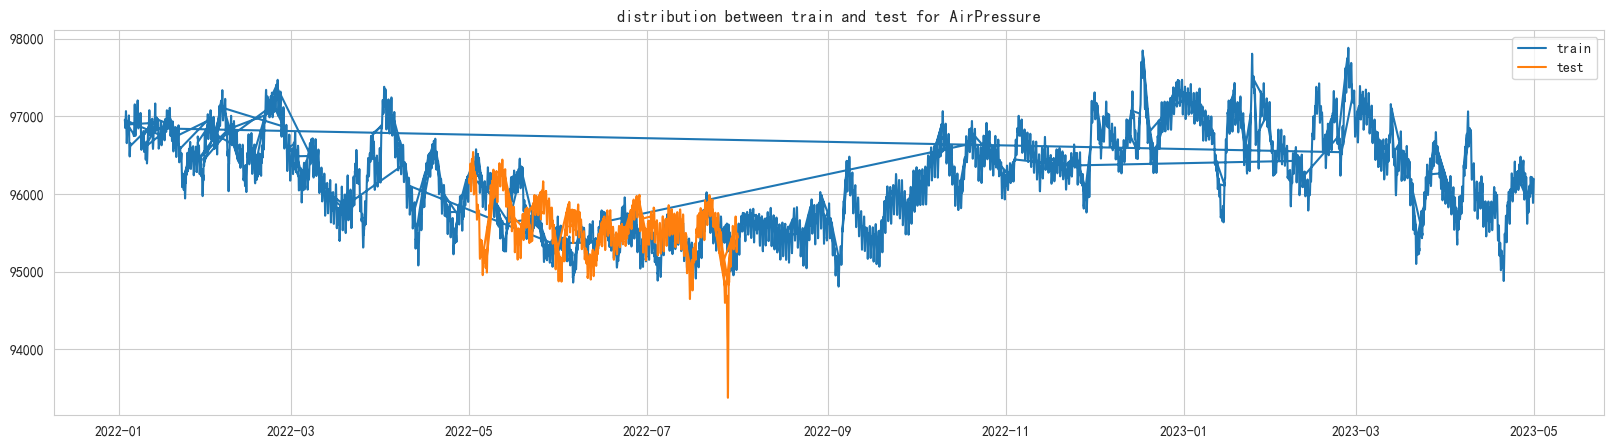

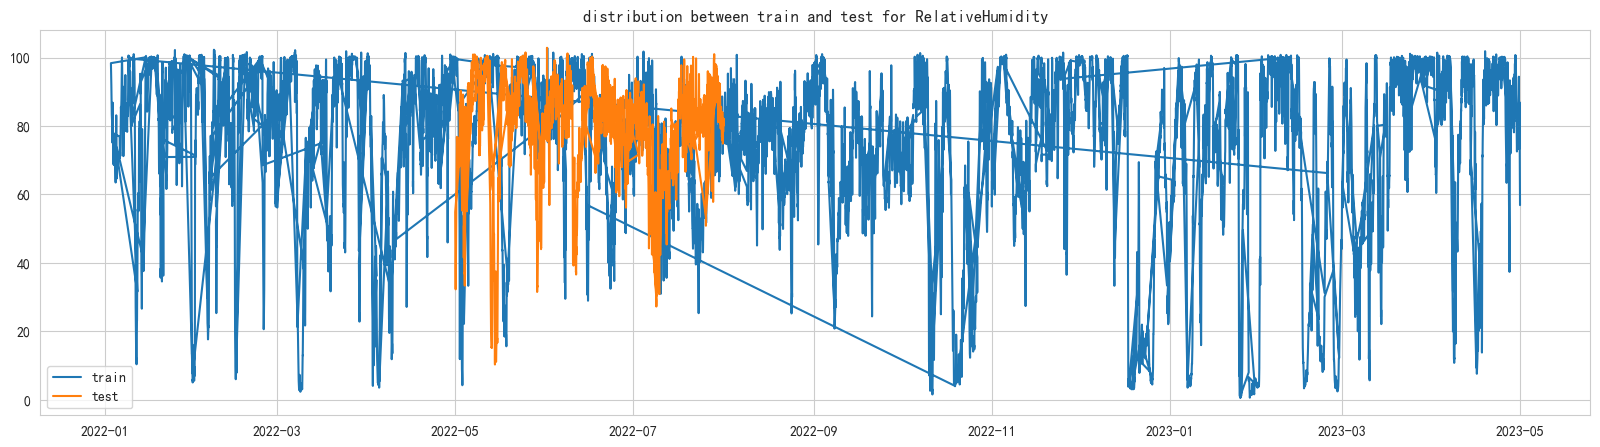

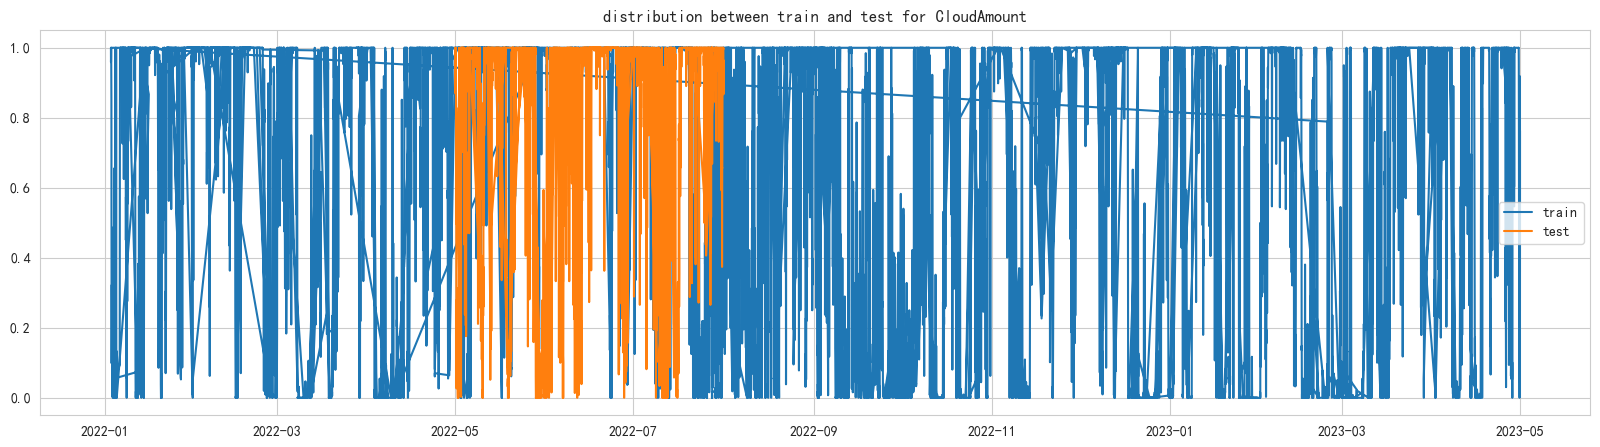

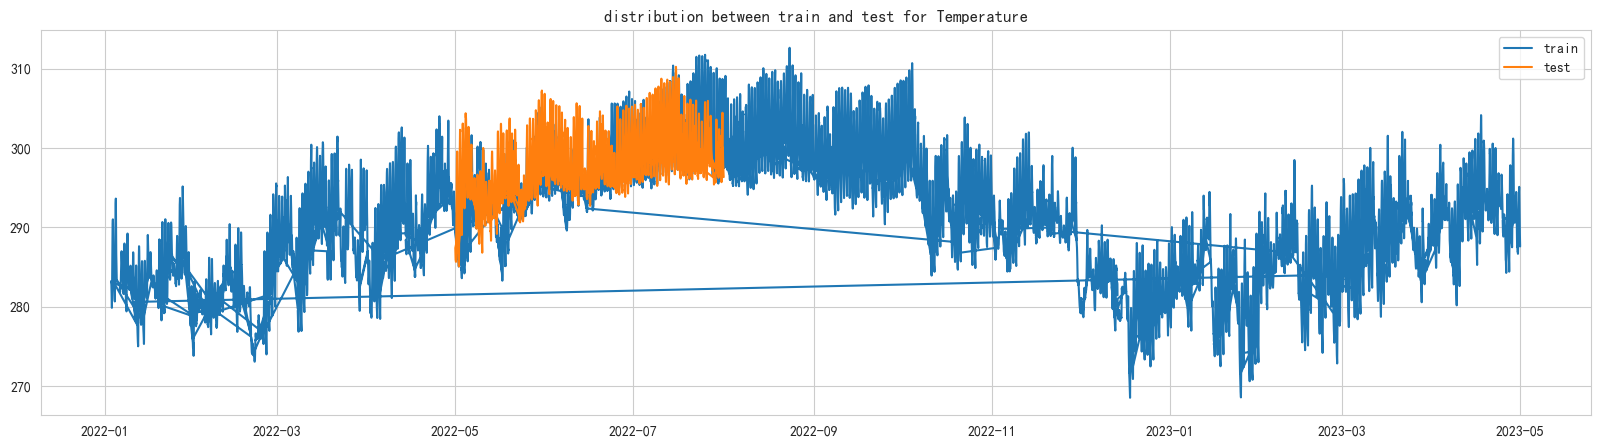

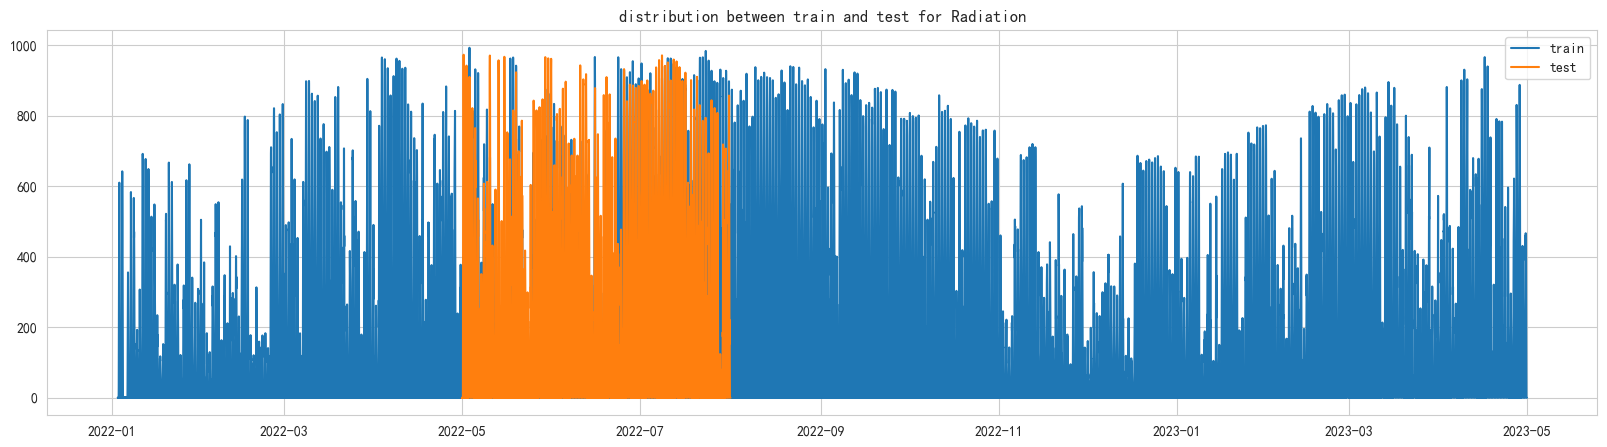

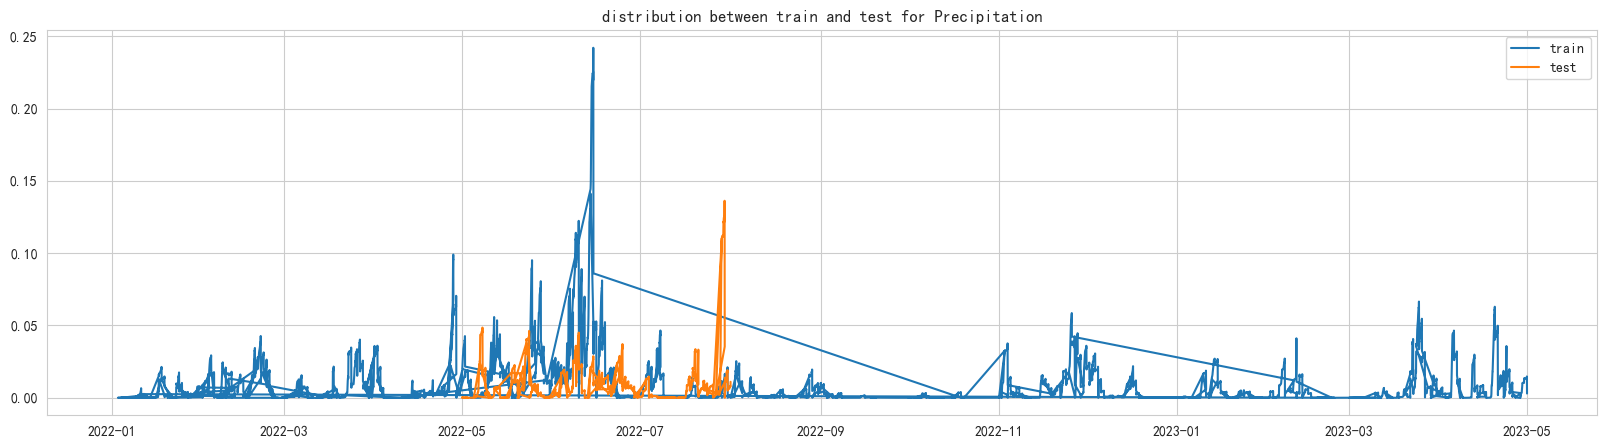

In [20]:
# analysis f8
train_f8=train[train.UserID=='f8']
test_f8=test[test.UserID=='f8']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f8.ts,train_f8[col],label='train')
    plt.plot(test_f8.ts.apply(lambda x:x-timedelta(days=365)),test_f8[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()

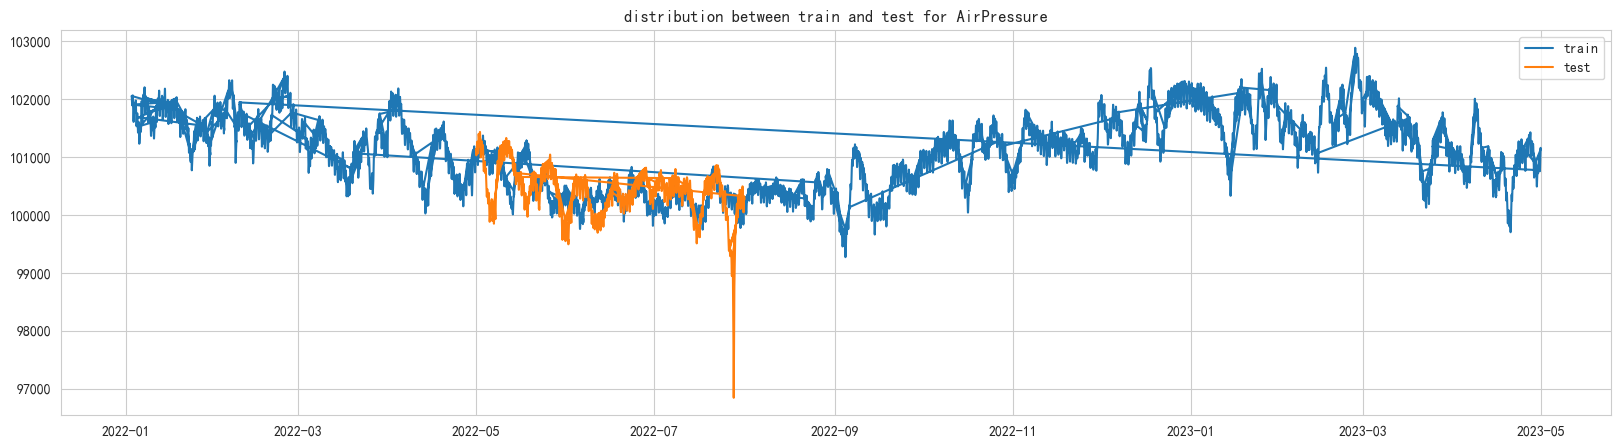

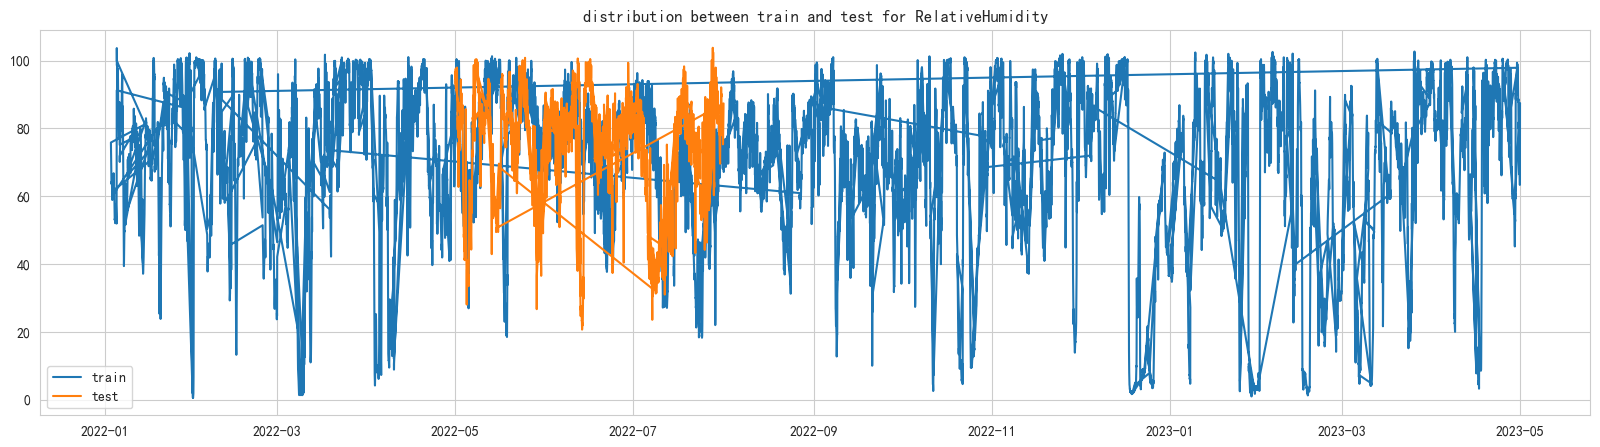

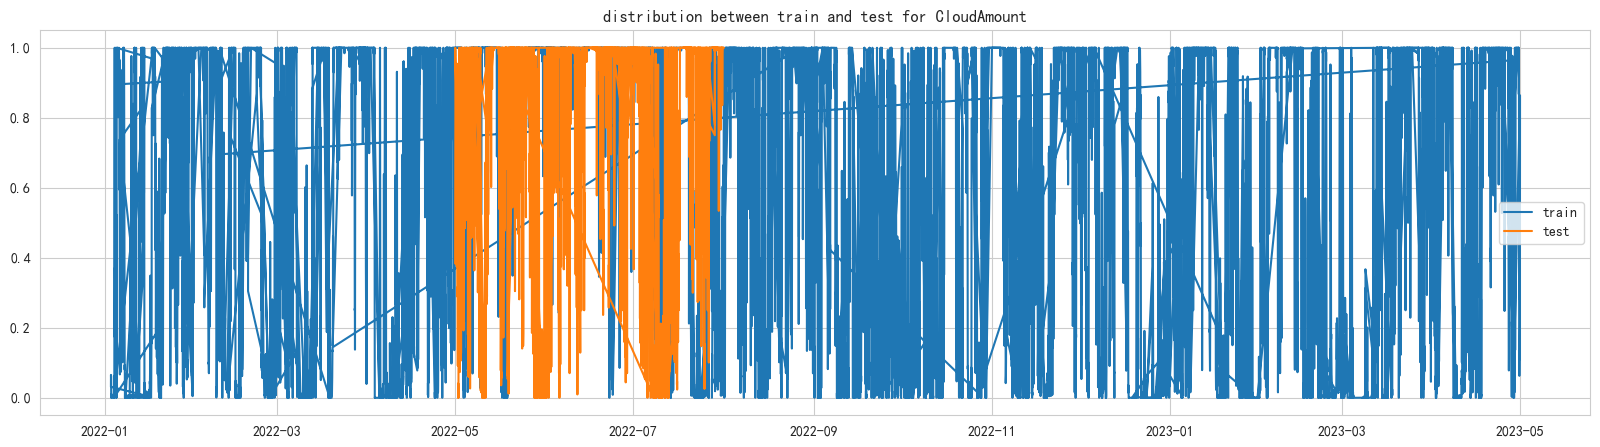

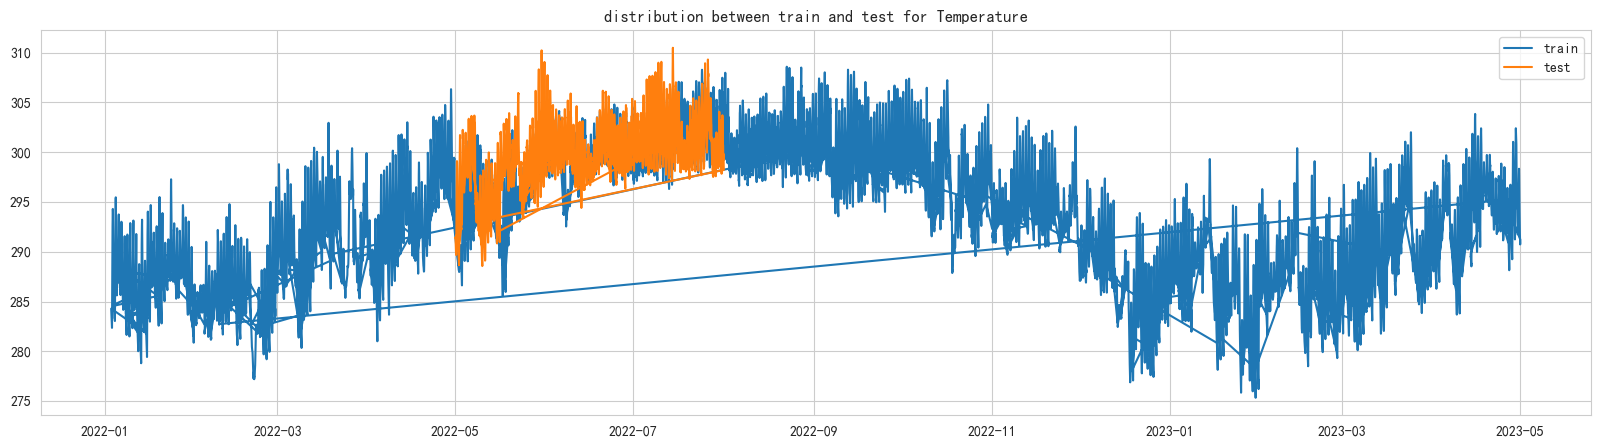

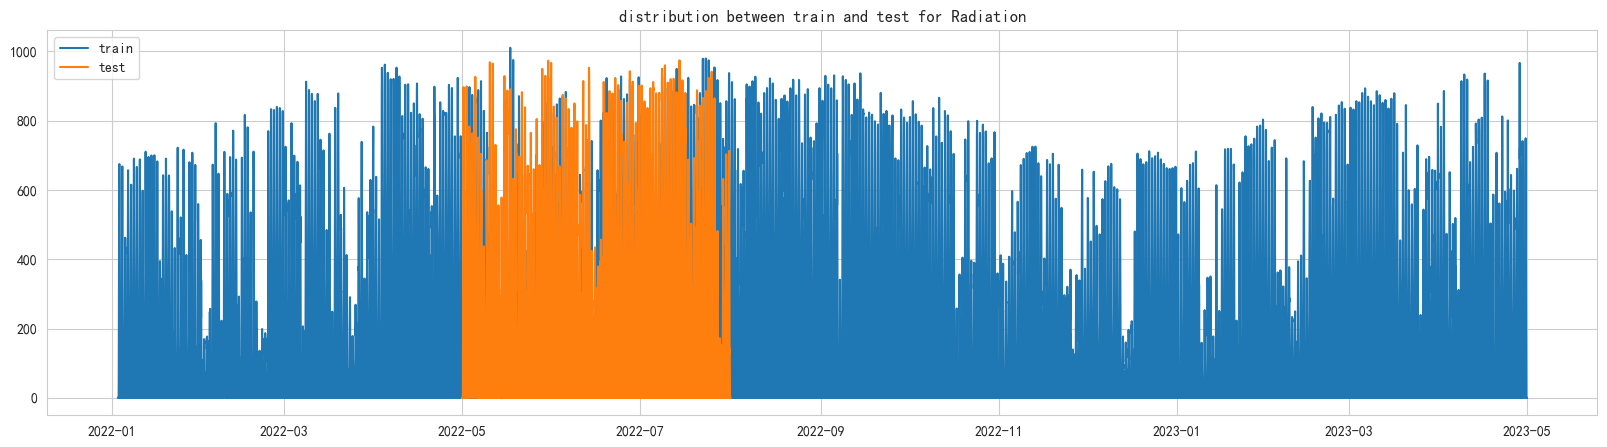

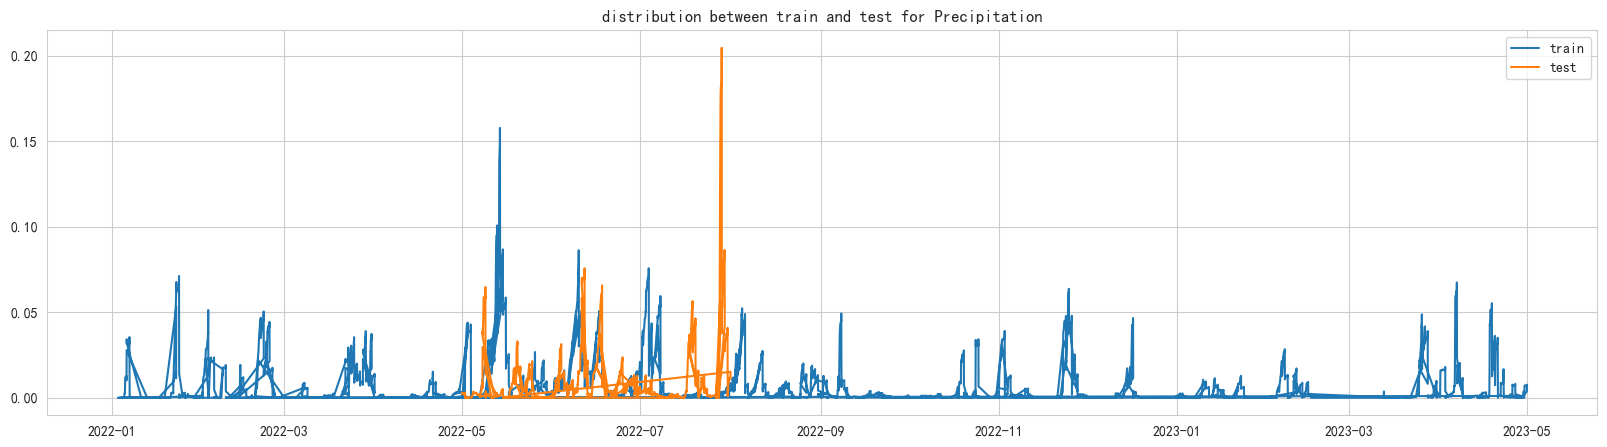

In [21]:
# analysis f9
train_f9=train[train.UserID=='f9']
test_f9=test[test.UserID=='f9']
for col in columns:
    plt.figure(figsize=(20,5))
    plt.plot(train_f9.ts,train_f9[col],label='train')
    plt.plot(test_f9.ts.apply(lambda x:x-timedelta(days=365)),test_f9[col],label='test')
    plt.title('distribution between train and test for '+col)
    plt.legend()
    plt.show()